In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)
pd.set_option('display.width',None)

In [3]:
telecom = pd.read_csv("telecom_churn_data.csv")
telecom.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

**Let's take a look into more details in the dataset.(Size and shape of it)**

In [4]:
telecom.shape

(99999, 226)

In [5]:
telecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


In [6]:
telecom.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.0,96140.0,94621.0,92254.0,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621

## 1. Exploratory Data Analysis

**Let's check for null values.**

In [7]:
((telecom.isna().sum()/telecom.shape[0])*100).sort_values(ascending=False)

count_rech_2g_6             74.846748
date_of_last_rech_data_6    74.846748
count_rech_3g_6             74.846748
av_rech_amt_data_6          74.846748
max_rech_data_6             74.846748
total_rech_data_6           74.846748
arpu_3g_6                   74.846748
arpu_2g_6                   74.846748
night_pck_user_6            74.846748
fb_user_6                   74.846748
arpu_3g_7                   74.428744
count_rech_2g_7             74.428744
fb_user_7                   74.428744
count_rech_3g_7             74.428744
arpu_2g_7                   74.428744
av_rech_amt_data_7          74.428744
max_rech_data_7             74.428744
night_pck_user_7            74.428744
total_rech_data_7           74.428744
date_of_last_rech_data_7    74.428744
night_pck_user_9            74.077741
date_of_last_rech_data_9    74.077741
fb_user_9                   74.077741
arpu_2g_9                   74.077741
max_rech_data_9             74.077741
arpu_3g_9                   74.077741
total_rech_d

**Let's drop columns having high percentage of null values.**

In [8]:
for i in telecom.columns:
       if (telecom[i].isna().sum()/telecom.shape[0])*100 >= 50:
                telecom.drop(i,axis=1,inplace=True)
telecom.shape    

(99999, 186)

*We can see number of columns has dropped by quite a margin.*

**Let's check for null values again.**

In [9]:
((telecom.isna().sum()/telecom.shape[0])*100).sort_values(ascending=False)

loc_ic_t2m_mou_9        7.745077
std_og_t2t_mou_9        7.745077
std_ic_t2f_mou_9        7.745077
std_ic_t2t_mou_9        7.745077
roam_og_mou_9           7.745077
loc_ic_mou_9            7.745077
loc_og_t2t_mou_9        7.745077
loc_ic_t2f_mou_9        7.745077
roam_ic_mou_9           7.745077
ic_others_9             7.745077
loc_og_mou_9            7.745077
std_ic_t2o_mou_9        7.745077
offnet_mou_9            7.745077
loc_ic_t2t_mou_9        7.745077
std_ic_mou_9            7.745077
onnet_mou_9             7.745077
og_others_9             7.745077
std_og_mou_9            7.745077
isd_ic_mou_9            7.745077
std_og_t2m_mou_9        7.745077
std_og_t2f_mou_9        7.745077
loc_og_t2f_mou_9        7.745077
std_og_t2c_mou_9        7.745077
spl_ic_mou_9            7.745077
isd_og_mou_9            7.745077
loc_og_t2c_mou_9        7.745077
spl_og_mou_9            7.745077
loc_og_t2m_mou_9        7.745077
std_ic_t2m_mou_9        7.745077
spl_ic_mou_8            5.378054
std_ic_t2f

<a> As we see there are no columns with null values more than 7%. Let's impute these values with any central tendency.

In [10]:
#Let's filter out the numeric columns
num_cols = telecom.select_dtypes(include=['int64','float64']).columns

In [11]:
cols_na = []
for i in num_cols:
    if telecom[i].isna().sum() > 0:
        cols_na.append(i)

In [12]:
for i in cols_na:
    telecom[i].fillna(telecom[i].median(), inplace=True)

In [13]:
telecom.isna().sum()

mobile_number              0
circle_id                  0
loc_og_t2o_mou             0
std_og_t2o_mou             0
loc_ic_t2o_mou             0
last_date_of_month_6       0
last_date_of_month_7     601
last_date_of_month_8    1100
last_date_of_month_9    1659
arpu_6                     0
arpu_7                     0
arpu_8                     0
arpu_9                     0
onnet_mou_6                0
onnet_mou_7                0
onnet_mou_8                0
onnet_mou_9                0
offnet_mou_6               0
offnet_mou_7               0
offnet_mou_8               0
offnet_mou_9               0
roam_ic_mou_6              0
roam_ic_mou_7              0
roam_ic_mou_8              0
roam_ic_mou_9              0
roam_og_mou_6              0
roam_og_mou_7              0
roam_og_mou_8              0
roam_og_mou_9              0
loc_og_t2t_mou_6           0
loc_og_t2t_mou_7           0
loc_og_t2t_mou_8           0
loc_og_t2t_mou_9           0
loc_og_t2m_mou_6           0
loc_og_t2m_mou

<a> We can see, for all the numeric columns there are zero null values

In [14]:
telecom['circle_id'].value_counts()

109    99999
Name: circle_id, dtype: int64

<a>**Since there is only one circle_id and all the customer belongs to the same circle_id let's drop circle_id column as it will have no role in the analysis. Let's also create a dataframe withtout the mobile_number column as we can add the column back after the classification analysis.**

In [15]:
telecom_data = telecom.drop(['circle_id','mobile_number'],axis=1)
mobile_numbers = telecom['mobile_number']

In [16]:
telecom_data.shape

(99999, 184)

In [17]:
telecom_data.head()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,34.31,32.33,0.00,29.84,96.31,91.735,0.00,87.29,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,11.91,11.61,0.00,11.26,41.03,40.43,0.00,39.12,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,65.11,63.685,0.00,61.84,0.00,0.00,0.00,0.00,3.95,3.635,0.00,2.50,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,11.64,11.09,0.00,8.41,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,15.69,15.74,0.16,15.66,56.49,57.08,4.13,56.61,0.88,0.93,1.15,0.96,92.16,92.55,5.44,91.64,0.00,0.00,0.00,0.00,2.03,2.04,0.00,1.74,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,5.89,5.96,0.00,5.38,0.00,0.00,5.44,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.00,4,3,2,6,362,252,252,0,252,252,252,0,6/21/2014,7/16/2014,8/8/2014,9/28/2014,252,252,252,0,30.13,1.32,5.75,0.0,83.57,150.76,109.61,0.00,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,968,30.4,0.0,101.20,3.58
1,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,355.074,268.321,86.285,24.11,78.68,7.68,18.34,15.74,99.840,304.76,53.76,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,23.88,74.56,7.68,18.34,11.51,75.94,291.86,53.76,0.00,0.00,0.00,0.00,0.0,2.91,0.00,0.00,35.39,150.510,299.54,72.11,0.23,4.11,0.00,0.00,0.00,0.460,0.13,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.23,4.58,0.13,0.00

### Feature Engineering

<a>**I think calls to same operators or other operators and mobile-mobile or mobile-landline will not add any value in predicting the churn of the customer. Hence I will go ahead and drop these columns.**

In [18]:
telecom_data.drop(telecom_data.columns[telecom_data.columns.str.contains('t2t')], axis=1, inplace=True)
telecom_data.drop(telecom_data.columns[telecom_data.columns.str.contains('t2m')], axis=1, inplace=True)
telecom_data.drop(telecom_data.columns[telecom_data.columns.str.contains('t2o')], axis=1, inplace=True)
telecom_data.drop(telecom_data.columns[telecom_data.columns.str.contains('t2f')], axis=1, inplace=True)

In [19]:
telecom_data.shape

(99999, 129)

<a> **As we can see number of columns have dropped to 129. I have kept the `t2c` columns as I think frequency of calls coming into the call centre can be useful in determining the intent or unhappiness of the customer in the action phase.**

In [20]:
telecom_data.head()

,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,34.31,32.33,0.00,29.84,96.31,91.735,0.00,87.29,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,65.11,63.685,0.00,61.84,0.0,0.0,0.0,0.0,11.64,11.09,0.00,8.41,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,92.16,92.55,5.44,91.64,5.89,5.96,0.00,5.38,0.00,0.00,5.44,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.00,4,3,2,6,362,252,252,0,252,252,252,0,6/21/2014,7/16/2014,8/8/2014,9/28/2014,252,252,252,0,30.13,1.32,5.75,0.0,83.57,150.76,109.61,0.00,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,968,30.4,0.0,101.20,3.58
1,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,355.074,268.321,86.285,24.11,78.68,7.68,18.34,15.74,99.840,304.76,53.76,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0,2.91,0.00,0.00,35.39,150.510,299.54,72.11,0.0,0.0,0.0,0.0,0.23,4.58,0.13,0.00,0.0,0.0,0.0,0.0,4.68,23.43,12.76,0.00,0.00,0.0,0.0,0.0,40.31,178.53,312.44,72.11,19.09,104.23,408.43,173.03,5.90,0.00,14.84,15.01,26.83,104.23,423.28,188.04,0.00,0.0,0.0,0.00,1.83,0.00,0.0,0.00,0.00,0.00,0.0,0.00,4,9,11,5,74,384,283,121,44,154,65,50,6/29/2014,7/31/2014,8/28/2014,9/30/2014,44,23,30,0,0.00,108.07,365.47,0.0,0.00,0.00,0.00,0.00,0,1,0,0,0,0,2,0,0,0,0,0,0,0,0,0,1006,0.0,0.0,0.00,0.00
2,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,189.058,210.226,290.714,11.54,55.24,37.26,74.81,143.33,220.590,208.36,118.91,0.0,0.00,0.00,38.49,0.0,0.00,0.00,70.94,0.0,135.54,45.76,0.48,60.66,67.410,67.66,64.81,0.0,0.0,0.0,0.0,47.64,108.68,120.94,18.04,0.0,0.0,0.0,0.0,46.56,236.84,96.84,42.08,0.45,0.0,0.0,0.0,155.33,412.94,285.46,124.94,229.56,208.86,155.99,345.41,139.33,306.66,239.03,171.49,370.04,519.53,395.03,517.74,0.21,0.0,0.0,0.45,0.00,0.85,0.0,0.01,0.93,3.14,0.0,0.36,5,4,2,7,168,315,116,358,86,200,86,100,6/17/2014,7/24/2014,8/14/2014,9/29/2014,0,200,86,0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,8.42,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1103,0.0,0.0,4.17,0.00
3,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338,251.102,508.054,389.500,99.91,54.39,310.98,241.71,123.31,109.010,71.68,113.54,0.0,54.86,44.38,0.00,0.0,28.09,39.04,0.00,0.0,0.00,0.00,0.00,183.03,118.680,37.99,83.03,0.0,0.0,0.0,0.0,29.23,16.63,296.11,236.21,0.0,0.0,0.0,0.0,10.96,0.00

In [21]:
# Let's drop the date columns as they can't be used for fetaure engineering techniques like dummy encoding or passed for feature selection techniques
telecom_data.drop(['last_date_of_month_6','last_date_of_month_7','last_date_of_month_8','last_date_of_month_9'], axis=1, inplace=True)

In [22]:
telecom_data.head()

,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,197.385,214.816,213.803,21.100,34.31,32.33,0.00,29.84,96.31,91.735,0.00,87.29,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,65.11,63.685,0.00,61.84,0.0,0.0,0.0,0.0,11.64,11.09,0.00,8.41,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,92.16,92.55,5.44,91.64,5.89,5.96,0.00,5.38,0.00,0.00,5.44,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.00,4,3,2,6,362,252,252,0,252,252,252,0,6/21/2014,7/16/2014,8/8/2014,9/28/2014,252,252,252,0,30.13,1.32,5.75,0.0,83.57,150.76,109.61,0.00,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,968,30.4,0.0,101.20,3.58
1,34.047,355.074,268.321,86.285,24.11,78.68,7.68,18.34,15.74,99.840,304.76,53.76,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0,2.91,0.00,0.00,35.39,150.510,299.54,72.11,0.0,0.0,0.0,0.0,0.23,4.58,0.13,0.00,0.0,0.0,0.0,0.0,4.68,23.43,12.76,0.00,0.00,0.0,0.0,0.0,40.31,178.53,312.44,72.11,19.09,104.23,408.43,173.03,5.90,0.00,14.84,15.01,26.83,104.23,423.28,188.04,0.00,0.0,0.0,0.00,1.83,0.00,0.0,0.00,0.00,0.00,0.0,0.00,4,9,11,5,74,384,283,121,44,154,65,50,6/29/2014,7/31/2014,8/28/2014,9/30/2014,44,23,30,0,0.00,108.07,365.47,0.0,0.00,0.00,0.00,0.00,0,1,0,0,0,0,2,0,0,0,0,0,0,0,0,0,1006,0.0,0.0,0.00,0.00
2,167.690,189.058,210.226,290.714,11.54,55.24,37.26,74.81,143.33,220.590,208.36,118.91,0.0,0.00,0.00,38.49,0.0,0.00,0.00,70.94,0.0,135.54,45.76,0.48,60.66,67.410,67.66,64.81,0.0,0.0,0.0,0.0,47.64,108.68,120.94,18.04,0.0,0.0,0.0,0.0,46.56,236.84,96.84,42.08,0.45,0.0,0.0,0.0,155.33,412.94,285.46,124.94,229.56,208.86,155.99,345.41,139.33,306.66,239.03,171.49,370.04,519.53,395.03,517.74,0.21,0.0,0.0,0.45,0.00,0.85,0.0,0.01,0.93,3.14,0.0,0.36,5,4,2,7,168,315,116,358,86,200,86,100,6/17/2014,7/24/2014,8/14/2014,9/29/2014,0,200,86,0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,8.42,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1103,0.0,0.0,4.17,0.00
3,221.338,251.102,508.054,389.500,99.91,54.39,310.98,241.71,123.31,109.010,71.68,113.54,0.0,54.86,44.38,0.00,0.0,28.09,39.04,0.00,0.0,0.00,0.00,0.00,183.03,118.680,37.99,83.03,0.0,0.0,0.0,0.0,29.23,16.63,296.11,236.21,0.0,0.0,0.0,0.0,10.96,0.00,18.09,43.29,0.00,0.0,0.0,0.0,223.23,135.31,352.21,362.54,233.48,111.59,48.18,160.19,45.99,105.01,4.94,143.83,280.08,216.61,53.13,305.38,0.59,0.0,0.0,0.55,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.80,10,11,18,14,230,310,601,410,60,50,50,50,6/28/2014,7

In [23]:
#Let's drop the date columns as they will not influence the analysis much and also we won't be able to pass them for 
#dummy variable creation or other feature engineering techniques

telecom_data.drop(['date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8'], axis=1, inplace=True)

<a> **Let's combine few variables like recharge amount for 6th and 7th month, which is considered to be good phase and drop the individual columns**

In [24]:
telecom_data['avg_rech_amt_good_phase'] = round((telecom_data['total_rech_amt_6']+telecom_data['total_rech_amt_7'])/2,2)

In [25]:
telecom_data.drop(['total_rech_amt_6','total_rech_amt_7'], axis=1, inplace=True)

In [26]:
telecom_data.head()

,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_rech_amt_good_phase
0,197.385,214.816,213.803,21.100,34.31,32.33,0.00,29.84,96.31,91.735,0.00,87.29,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,65.11,63.685,0.00,61.84,0.0,0.0,0.0,0.0,11.64,11.09,0.00,8.41,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,92.16,92.55,5.44,91.64,5.89,5.96,0.00,5.38,0.00,0.00,5.44,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.00,4,3,2,6,252,0,252,252,252,0,9/28/2014,252,252,252,0,30.13,1.32,5.75,0.0,83.57,150.76,109.61,0.00,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,968,30.4,0.0,101.20,3.58,307.0
1,34.047,355.074,268.321,86.285,24.11,78.68,7.68,18.34,15.74,99.840,304.76,53.76,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0,2.91,0.00,0.00,35.39,150.510,299.54,72.11,0.0,0.0,0.0,0.0,0.23,4.58,0.13,0.00,0.0,0.0,0.0,0.0,4.68,23.43,12.76,0.00,0.00,0.0,0.0,0.0,40.31,178.53,312.44,72.11,19.09,104.23,408.43,173.03,5.90,0.00,14.84,15.01,26.83,104.23,423.28,188.04,0.00,0.0,0.0,0.00,1.83,0.00,0.0,0.00,0.00,0.00,0.0,0.00,4,9,11,5,283,121,44,154,65,50,9/30/2014,44,23,30,0,0.00,108.07,365.47,0.0,0.00,0.00,0.00,0.00,0,1,0,0,0,0,2,0,0,0,0,0,0,0,0,0,1006,0.0,0.0,0.00,0.00,229.0
2,167.690,189.058,210.226,290.714,11.54,55.24,37.26,74.81,143.33,220.590,208.36,118.91,0.0,0.00,0.00,38.49,0.0,0.00,0.00,70.94,0.0,135.54,45.76,0.48,60.66,67.410,67.66,64.81,0.0,0.0,0.0,0.0,47.64,108.68,120.94,18.04,0.0,0.0,0.0,0.0,46.56,236.84,96.84,42.08,0.45,0.0,0.0,0.0,155.33,412.94,285.46,124.94,229.56,208.86,155.99,345.41,139.33,306.66,239.03,171.49,370.04,519.53,395.03,517.74,0.21,0.0,0.0,0.45,0.00,0.85,0.0,0.01,0.93,3.14,0.0,0.36,5,4,2,7,116,358,86,200,86,100,9/29/2014,0,200,86,0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,8.42,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1103,0.0,0.0,4.17,0.00,241.5
3,221.338,251.102,508.054,389.500,99.91,54.39,310.98,241.71,123.31,109.010,71.68,113.54,0.0,54.86,44.38,0.00,0.0,28.09,39.04,0.00,0.0,0.00,0.00,0.00,183.03,118.680,37.99,83.03,0.0,0.0,0.0,0.0,29.23,16.63,296.11,236.21,0.0,0.0,0.0,0.0,10.96,0.00,18.09,43.29,0.00,0.0,0.0,0.0,223.23,135.31,352.21,362.54,233.48,111.59,48.18,160.19,45.99,105.01,4.94,143.83,280.08,216.61,53.13,305.38,0.59,0.0,0.0,0.55,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.80,10,11,18,14,601,410,60,50,50,50,9/30/2014,30,50,50,30,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2491,0.0,0.0,0.00,0.00,270.0
4,261.636,309.876,238.174,163.426,50.31,149.44,83.89,58.78,76

<a> **Let's filter out the `High-value` customers.**

In [27]:
telecom_data['avg_rech_amt_good_phase'].quantile([0.70])

0.7    368.5
Name: avg_rech_amt_good_phase, dtype: float64

In [28]:
telecom_hv = telecom_data[telecom_data['avg_rech_amt_good_phase'] >= 368.5]
telecom_hv.shape

(30011, 121)

<a> **We can see that we have approx 30k rows of high-value customers that we need to focus on.**

#### Now let's tag the churners now for the churn phase

In [29]:
telecom_hv[['total_ic_mou_9','total_og_mou_9','vol_2g_mb_9','vol_3g_mb_9']].head()

,total_ic_mou_9,total_og_mou_9,vol_2g_mb_9,vol_3g_mb_9
7,0.00,0.00,0.0,0.0
8,34.91,142.18,0.0,0.0
13,631.86,446.09,0.0,0.0
16,334.56,255.74,0.0,0.0
17,87.13,631.08,0.0,0.0


In [30]:
telecom_hv['Churn'] = np.where((telecom_hv['total_ic_mou_9']==0) & (telecom_hv['total_og_mou_9']==0) & (telecom_hv['vol_2g_mb_9']==0) & (telecom_hv['vol_3g_mb_9']==0),1,0)

In [180]:
telecom_hv[telecom_hv['Churn']==1].shape

(2593, 75)

<a> **As we can see we have successfully tagged the churners among the high value customers. We are getting 2593 churn customers**

**Now let's remove all the attributes related to the churn phase i.e. the 9th month as these attributes will be now redundant in the analysis.**

In [32]:
telecom_hv.drop(telecom_hv.columns[telecom_hv.columns.str.contains('_9')], axis=1, inplace=True)

telecom_hv.shape

(30011, 92)

In [33]:
telecom_hv.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_rech_amt_good_phase,Churn
7,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,0.0,0.0,0.00,422.16,533.91,255.79,0.0,0.0,0.0,60.86,75.14,77.84,0.0,0.18,10.01,4.50,0.00,6.50,0.00,0.0,0.0,487.53,609.24,350.16,427.88,355.23,188.04,180.54,173.08,193.94,626.46,558.04,428.74,0.21,0.0,0.0,2.06,14.53,31.59,15.74,15.19,15.14,5,5,7,3638,1580,790,1580,0,0,779,0.0,0.0,0.00,0.0,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,802,57.74,19.38,18.74,0.0,1185.0,1
8,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,7.15,378.09,288.18,63.04,0.0,0.0,0.0,130.26,143.48,98.28,0.0,0.00,0.00,0.00,0.00,10.23,0.00,0.0,0.0,508.36,431.66,171.56,81.43,23.83,15.79,22.43,4.66,0.75,103.86,28.49,16.54,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,19,21,14,120,90,154,30,50,0,10,0.0,356.0,0.03,0.0,750.95,11.94,0,1,0,0,1,3,0,0,0,0,0,0,315,21.03,910.65,122.16,0.0,519.0,0
13,492.846,205.671,593.260,501.76,108.39,534.24,413.31,119.28,482.46,23.53,144.24,72.11,7.98,35.26,1.44,0.0,0.0,0.49,205.31,53.48,353.99,0.0,0.0,0.0,701.78,138.93,655.18,0.0,0.00,1.29,0.00,0.00,4.78,0.00,0.0,0.0,907.09,192.41,1015.26,215.58,26.11,255.26,423.81,68.09,474.41,968.61,172.58,1144.53,0.45,0.0,0.0,245.28,62.11,393.39,83.48,16.24,21.44,6,4,11,717,110,110,130,110,50,0,0.0,0.0,0.02,0.0,0.00,0.00,0,0,0,0,0,3,0,0,0,0,0,0,2607,0.00,0.00,0.00,0.0,380.0,0
16,430.975,299.869,187.894,50.51,74.01,70.61,296.29,229.74,162.76,0.00,2.83,0.00,0.00,17.74,0.00,0.0,0.0,0.00,315.91,215.64,205.93,0.0,0.0,0.0,30.89,67.09,21.53,0.0,0.00,0.00,0.00,3.26,5.91,0.00,0.0,0.0,346.81,286.01,233.38,276.86,229.83,211.78,87.99,151.73,82.44,364.86,381.56,294.46,0.00,0.0,0.0,0.00,0.00,0.23,0.00,0.00,0.00,10,6,2,160,110,110,130,100,100,130,0.0,0.0,0.00,0.0,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,511,0.00,2.45,21.89,0.0,459.0,0
17,690.008,18.980,25.499,1185.91,9.28,7.79,61.64,0.00,5.54,0.00,4.76,4.81,0.00,8.46,13.34,0.0,0.0,0.00,97.54,0.00,0.00,0.0,0.0,0.0,1148.46,0.81,0.00,0.0,0.00,0.00,2.58,0.00,0.00,0.93,0.0,0.0,1249.53,0.81,0.00,81.96,2.31,0.00,9.91,0.00,0.00,91.88,2.31,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,19,2,4,30,110,0,30,30,0,0,0.0,0.0,0.00,0.0,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,667,0.00,0.00,0.00,0.0,408.0,0


**Let's combine the revenue columns for the action phase and take the average revenue as the derived column.**

In [34]:
telecom_hv['arpu_action_phase'] = telecom_hv['arpu_6']+telecom_hv['arpu_7']+telecom_hv['arpu_8']
telecom_hv.drop(['arpu_6','arpu_7','arpu_8'], axis=1, inplace=True)

In [35]:
telecom_hv.head()

,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_rech_amt_good_phase,Churn,arpu_action_phase
7,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,0.0,0.0,0.00,422.16,533.91,255.79,0.0,0.0,0.0,60.86,75.14,77.84,0.0,0.18,10.01,4.50,0.00,6.50,0.00,0.0,0.0,487.53,609.24,350.16,427.88,355.23,188.04,180.54,173.08,193.94,626.46,558.04,428.74,0.21,0.0,0.0,2.06,14.53,31.59,15.74,15.19,15.14,5,5,7,3638,1580,790,1580,0,0,779,0.0,0.0,0.00,0.0,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,802,57.74,19.38,18.74,0.0,1185.0,1,5590.510
8,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,7.15,378.09,288.18,63.04,0.0,0.0,0.0,130.26,143.48,98.28,0.0,0.00,0.00,0.00,0.00,10.23,0.00,0.0,0.0,508.36,431.66,171.56,81.43,23.83,15.79,22.43,4.66,0.75,103.86,28.49,16.54,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,19,21,14,120,90,154,30,50,0,10,0.0,356.0,0.03,0.0,750.95,11.94,0,1,0,0,1,3,0,0,0,0,0,0,315,21.03,910.65,122.16,0.0,519.0,0,1008.306
13,501.76,108.39,534.24,413.31,119.28,482.46,23.53,144.24,72.11,7.98,35.26,1.44,0.0,0.0,0.49,205.31,53.48,353.99,0.0,0.0,0.0,701.78,138.93,655.18,0.0,0.00,1.29,0.00,0.00,4.78,0.00,0.0,0.0,907.09,192.41,1015.26,215.58,26.11,255.26,423.81,68.09,474.41,968.61,172.58,1144.53,0.45,0.0,0.0,245.28,62.11,393.39,83.48,16.24,21.44,6,4,11,717,110,110,130,110,50,0,0.0,0.0,0.02,0.0,0.00,0.00,0,0,0,0,0,3,0,0,0,0,0,0,2607,0.00,0.00,0.00,0.0,380.0,0,1291.777
16,50.51,74.01,70.61,296.29,229.74,162.76,0.00,2.83,0.00,0.00,17.74,0.00,0.0,0.0,0.00,315.91,215.64,205.93,0.0,0.0,0.0,30.89,67.09,21.53,0.0,0.00,0.00,0.00,3.26,5.91,0.00,0.0,0.0,346.81,286.01,233.38,276.86,229.83,211.78,87.99,151.73,82.44,364.86,381.56,294.46,0.00,0.0,0.0,0.00,0.00,0.23,0.00,0.00,0.00,10,6,2,160,110,110,130,100,100,130,0.0,0.0,0.00,0.0,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,511,0.00,2.45,21.89,0.0,459.0,0,918.738
17,1185.91,9.28,7.79,61.64,0.00,5.54,0.00,4.76,4.81,0.00,8.46,13.34,0.0,0.0,0.00,97.54,0.00,0.00,0.0,0.0,0.0,1148.46,0.81,0.00,0.0,0.00,0.00,2.58,0.00,0.00,0.93,0.0,0.0,1249.53,0.81,0.00,81.96,2.31,0.00,9.91,0.00,0.00,91.88,2.31,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,19,2,4,30,110,0,30,30,0,0,0.0,0.0,0.00,0.0,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,667,0.00,0.00,0.00,0.0,408.0,0,734.487


In [36]:
telecom_hv.sort_values(by=['arpu_action_phase'], ascending=False).head()

,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_rech_amt_good_phase,Churn,arpu_action_phase
38610,5.69,5.14,7.01,3231.81,3868.59,3625.43,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.00,8.21,5.54,15.31,0.0,0.0,0.0,0.00,0.18,0.00,3229.29,3868.01,3629.91,0.00,0.00,0.00,0.00,0.0,0.0,3237.51,3873.74,3645.23,11.49,16.51,27.01,2.28,0.00,5.06,551.04,525.71,596.03,0.13,0.06,0.00,536.99,504.01,556.74,0.13,5.11,7.19,29,17,19,45320,3100,3100,3100,3100,3100,35,0.00,0.0,0.00,0.00,0.0,0.00,0,0,0,0,0,0,0,0,0,0,0,0,460,0.00,0.00,0.00,0.00,37762.5,0,96420.546
51314,0.18,0.00,0.00,5905.14,5490.28,5836.76,0.0,0.0,1.00,0.0,0.0,139.98,1.83,0.00,7.85,0.78,0.00,0.00,0.0,0.0,0.0,2.05,0.00,0.00,5900.66,5490.28,5681.54,2.81,0.00,16.93,0.00,0.0,0.0,5906.31,5490.28,5698.48,0.59,0.35,0.05,1.78,3.98,0.00,3.86,5.71,1.08,0.20,0.00,0.21,0.56,1.38,0.81,0.71,0.00,0.00,43,45,38,18914,1119,1050,1000,250,250,1000,1.31,0.0,25.11,12.34,0.0,821.39,0,0,0,0,0,0,1,0,1,0,0,0,289,827.43,261.36,5.82,9.05,17282.5,0,46152.276
67717,9.29,16.61,11.63,1493.98,1921.29,1498.31,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.15,0.00,35.04,31.16,17.91,0.0,0.0,0.0,7.86,2.25,0.91,1460.36,1910.73,1498.53,0.00,0.15,0.00,0.00,0.0,0.0,1503.28,1944.29,1517.36,27.43,18.08,25.49,17.99,7.76,10.96,210.74,155.96,211.63,0.00,0.00,0.00,165.31,130.11,175.16,0.00,0.00,0.00,71,26,34,13080,350,3100,3100,250,3100,3100,0.00,0.0,0.00,0.00,0.0,0.00,0,0,0,0,0,0,0,0,0,0,0,0,374,0.00,0.00,0.00,0.00,16150.0,0,40614.779
33019,0.00,0.00,0.00,177.53,58.44,107.03,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.00,159.73,54.18,47.08,0.0,0.0,0.0,17.79,4.26,59.95,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,177.53,58.44,107.03,87.18,21.16,27.36,1.93,0.00,12.81,89.11,21.16,40.18,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,9,9,6,14000,3000,3000,3000,0,0,3000,0.00,0.0,0.00,0.00,0.0,0.00,0,0,0,0,0,0,0,0,0,0,0,0,2567,0.00,0.00,0.00,0.00,18750.0,0,33070.522
93779,47.54,57.38,3.64,1220.16,1404.43,328.64,0.0,0.0,122.19,0.0,0.0,98.78,0.00,0.00,0.00,32.54,27.53,12.19,0.0,0.0,0.0,211.94,168.48,158.71,0.00,0.00,0.00,1023.21,1265.79,62.59,26.06,0.0,0.0,1293.78,1461.81,233.51,74.93,98.64,2.39,290.63,356.23,225.84,368.96,461.74,228.24,0.00,0.00,0.00,2.23,6.86,0.00,1.16,0.00,0.00,10,12,25,20405,790,974,1580,565,790,1464,0.00,0.0,0.00,0.00,0.0,0.00,0,0,0,0,0,0,0,0,0,0,0,0,2720,500.18,227.77,123.73,1526.52,6060.5,0,32270.478


<a> **These are the top 5 revenue generators for the 6th, 7th and 8th months. It is always handy to look at the attributes for these customers.**

In [37]:
#Let's look at the average dials(incoming and outgoing) for the action phase

telecom_hv['avg_og_mou'] = round((telecom_hv['total_og_mou_6']+telecom_hv['total_og_mou_7']+telecom_hv['total_og_mou_8'])/3,2)
telecom_hv['avg_ic_mou'] = round((telecom_hv['total_ic_mou_6']+telecom_hv['total_ic_mou_7']+telecom_hv['total_ic_mou_8'])/3,2)

#let's drop the redundant columns now
telecom_hv.drop(['total_og_mou_6','total_og_mou_7','total_og_mou_8'], axis=1, inplace=True)
telecom_hv.drop(['total_ic_mou_6','total_ic_mou_7','total_ic_mou_8'], axis=1, inplace=True)

In [38]:
telecom_hv.head()

,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_rech_amt_good_phase,Churn,arpu_action_phase,avg_og_mou,avg_ic_mou
7,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,0.0,0.0,0.00,422.16,533.91,255.79,0.0,0.0,0.0,60.86,75.14,77.84,0.0,0.18,10.01,4.50,0.00,6.50,0.00,0.0,0.0,427.88,355.23,188.04,180.54,173.08,193.94,0.21,0.0,0.0,2.06,14.53,31.59,15.74,15.19,15.14,5,5,7,3638,1580,790,1580,0,0,779,0.0,0.0,0.00,0.0,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,802,57.74,19.38,18.74,0.0,1185.0,1,5590.510,482.31,537.75
8,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,7.15,378.09,288.18,63.04,0.0,0.0,0.0,130.26,143.48,98.28,0.0,0.00,0.00,0.00,0.00,10.23,0.00,0.0,0.0,81.43,23.83,15.79,22.43,4.66,0.75,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,19,21,14,120,90,154,30,50,0,10,0.0,356.0,0.03,0.0,750.95,11.94,0,1,0,0,1,3,0,0,0,0,0,0,315,21.03,910.65,122.16,0.0,519.0,0,1008.306,370.53,49.63
13,501.76,108.39,534.24,413.31,119.28,482.46,23.53,144.24,72.11,7.98,35.26,1.44,0.0,0.0,0.49,205.31,53.48,353.99,0.0,0.0,0.0,701.78,138.93,655.18,0.0,0.00,1.29,0.00,0.00,4.78,0.00,0.0,0.0,215.58,26.11,255.26,423.81,68.09,474.41,0.45,0.0,0.0,245.28,62.11,393.39,83.48,16.24,21.44,6,4,11,717,110,110,130,110,50,0,0.0,0.0,0.02,0.0,0.00,0.00,0,0,0,0,0,3,0,0,0,0,0,0,2607,0.00,0.00,0.00,0.0,380.0,0,1291.777,704.92,761.91
16,50.51,74.01,70.61,296.29,229.74,162.76,0.00,2.83,0.00,0.00,17.74,0.00,0.0,0.0,0.00,315.91,215.64,205.93,0.0,0.0,0.0,30.89,67.09,21.53,0.0,0.00,0.00,0.00,3.26,5.91,0.00,0.0,0.0,276.86,229.83,211.78,87.99,151.73,82.44,0.00,0.0,0.0,0.00,0.00,0.23,0.00,0.00,0.00,10,6,2,160,110,110,130,100,100,130,0.0,0.0,0.00,0.0,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,511,0.00,2.45,21.89,0.0,459.0,0,918.738,288.73,346.96
17,1185.91,9.28,7.79,61.64,0.00,5.54,0.00,4.76,4.81,0.00,8.46,13.34,0.0,0.0,0.00,97.54,0.00,0.00,0.0,0.0,0.0,1148.46,0.81,0.00,0.0,0.00,0.00,2.58,0.00,0.00,0.93,0.0,0.0,81.96,2.31,0.00,9.91,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,19,2,4,30,110,0,30,30,0,0,0.0,0.0,0.00,0.0,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,667,0.00,0.00,0.00,0.0,408.0,0,734.487,416.78,31.40


In [39]:
#Let's total the recharge number for 6th,7th and 8th months as the good phase
#Let's look add up the dials within and outside the network

telecom_hv['tot_rech_num_action_phase'] = telecom_hv['total_rech_num_6']+telecom_hv['total_rech_num_7']+telecom_hv['total_rech_num_8']
telecom_hv['tot_onnet_mou'] = telecom_hv['onnet_mou_6']+telecom_hv['onnet_mou_7']+telecom_hv['onnet_mou_8']
telecom_hv['tot_offnet_mou'] = telecom_hv['offnet_mou_6']+telecom_hv['offnet_mou_7']+telecom_hv['offnet_mou_8']

#Let's drop the redundant columns now
telecom_hv.drop(['total_rech_num_6','total_rech_num_7','total_rech_num_8'], axis=1, inplace=True)
telecom_hv.drop(['onnet_mou_6','onnet_mou_7','onnet_mou_8','offnet_mou_6','offnet_mou_7','offnet_mou_8'], axis=1, inplace=True)

In [40]:
telecom_hv.describe()

,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_rech_amt_good_phase,Churn,arpu_action_phase,avg_og_mou,avg_ic_mou,tot_rech_num_action_phase,tot_onnet_mou,tot_offnet_mou
count,30011.000000,30011.000000,30011.00000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.0,30011.0,30011.0,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000
mean,17.412764,13.522114,13.25627,29.321648,22.036003,21.469272,1.567160,1.862229,1.712739,283.633988,284.750474,263.225832,0.0,0.0,0.0,394.988557,415.439956,353.884193,2.264425,2.207400,2.029314,5.916364,7.425487,6.885193,0.692507,0.047600,0.059131,244.938736,248.578813,237.214253,51.185010,53.428034,48.354771,0.066731,0.018066,0.027660,11.156530,12.360190,11.700835,1.188803,1.476889,1.237756,613.638799,171.414048,175.661058,162.869348,104.485655,105.287128,95.653294,78.859009,78.171382,69.209105,258.392681,278.093737,269.864111,0.124854,0.131352,0.114058,0.500383,0.587185,0.607611,0.173903,0.185132,0.173203,0.137916,0.150212,0.140415,1264.064776,129.439626,135.127102,121.360548,6.562685,696.664356,0.086402,1711.277263,673.198969,305.938055,34.260105,869.677176,1221.699570
std,79.152657,76.303736,74.55207,118.570414,97.925249,106.244774,6.889317,9.255645,7.397562,379.532583,375.404894,365.285105,0.0,0.0,0.0,606.430042,637.374715,616.035639,45.918087,45.619381,44.794926,18.621373,23.065743,22.893414,2.281325,2.741786,3.320320,312.189558,314.869919,305.234806,140.482823,149.159101,140.906093,0.194273,0.181944,0.116574,67.258387,76.992293,74.928607,13.987003,15.406483,12.889879,601.821630,174.703215,181.545389,172.605809,142.767207,141.148386,145.260363,277.445058,280.331857,268.494284,866.195376,855.682340,859.299266,0.374512,0.387673,0.357272,1.699665,1.900461,1.844444,0.574285,0.620418,0.582932,0.875528,0.969286,0.974727,975.263117,390.478591,408.024394,389.726031,48.638658,488.782088,0.280961,1223.898755,586.895034,334.244070,25.104761,1260.367512,1258.401371
min,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0

In [41]:
telecom_hv.columns[telecom_hv.columns.str.contains('t2c')]

Index(['loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8',
       'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8'],
      dtype='object')

In [42]:
#Let's total the interaction minutes between operator and customer for local and std calls
telecom_hv['tot_t2c'] = telecom_hv['loc_og_t2c_mou_6']+telecom_hv['loc_og_t2c_mou_7']+telecom_hv['loc_og_t2c_mou_8']+telecom_hv['std_og_t2c_mou_6']+telecom_hv['std_og_t2c_mou_7']+telecom_hv['std_og_t2c_mou_8']

telecom_hv.drop(['loc_og_t2c_mou_6','loc_og_t2c_mou_7','loc_og_t2c_mou_8','std_og_t2c_mou_6','std_og_t2c_mou_7','std_og_t2c_mou_8'], axis=1, inplace=True)

In [43]:
telecom_hv.head()

,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_rech_amt_good_phase,Churn,arpu_action_phase,avg_og_mou,avg_ic_mou,tot_rech_num_action_phase,tot_onnet_mou,tot_offnet_mou,tot_t2c
7,16.23,33.49,31.64,23.74,12.59,38.06,422.16,533.91,255.79,60.86,75.14,77.84,0.0,0.18,10.01,4.50,0.00,6.50,0.00,0.0,0.0,427.88,355.23,188.04,180.54,173.08,193.94,0.21,0.0,0.0,2.06,14.53,31.59,15.74,15.19,15.14,3638,1580,790,1580,0,0,779,0.0,0.0,0.00,0.0,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,802,57.74,19.38,18.74,0.0,1185.0,1,5590.510,482.31,537.75,17,164.81,1346.50,0.00
8,0.00,0.00,0.00,0.00,0.00,0.00,378.09,288.18,63.04,130.26,143.48,98.28,0.0,0.00,0.00,0.00,0.00,10.23,0.00,0.0,0.0,81.43,23.83,15.79,22.43,4.66,0.75,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,120,90,154,30,50,0,10,0.0,356.0,0.03,0.0,750.95,11.94,0,1,0,0,1,3,0,0,0,0,0,0,315,21.03,910.65,122.16,0.0,519.0,0,1008.306,370.53,49.63,54,799.80,311.77,7.15
13,23.53,144.24,72.11,7.98,35.26,1.44,205.31,53.48,353.99,701.78,138.93,655.18,0.0,0.00,1.29,0.00,0.00,4.78,0.00,0.0,0.0,215.58,26.11,255.26,423.81,68.09,474.41,0.45,0.0,0.0,245.28,62.11,393.39,83.48,16.24,21.44,717,110,110,130,110,50,0,0.0,0.0,0.02,0.0,0.00,0.00,0,0,0,0,0,3,0,0,0,0,0,0,2607,0.00,0.00,0.00,0.0,380.0,0,1291.777,704.92,761.91,21,1144.39,1015.05,0.49
16,0.00,2.83,0.00,0.00,17.74,0.00,315.91,215.64,205.93,30.89,67.09,21.53,0.0,0.00,0.00,0.00,3.26,5.91,0.00,0.0,0.0,276.86,229.83,211.78,87.99,151.73,82.44,0.00,0.0,0.0,0.00,0.00,0.23,0.00,0.00,0.00,160,110,110,130,100,100,130,0.0,0.0,0.00,0.0,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,511,0.00,2.45,21.89,0.0,459.0,0,918.738,288.73,346.96,18,195.13,688.79,0.00
17,0.00,4.76,4.81,0.00,8.46,13.34,97.54,0.00,0.00,1148.46,0.81,0.00,0.0,0.00,0.00,2.58,0.00,0.00,0.93,0.0,0.0,81.96,2.31,0.00,9.91,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,30,110,0,30,30,0,0,0.0,0.0,0.00,0.0,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,667,0.00,0.00,0.00,0.0,408.0,0,734.487,416.78,31.40,25,1202.98,67.18,0.00


**Let's check for class imbalance in the `Churn` column**

In [44]:
telecom_hv['Churn'].value_counts(normalize=True)*100

0    91.359835
1     8.640165
Name: Churn, dtype: float64

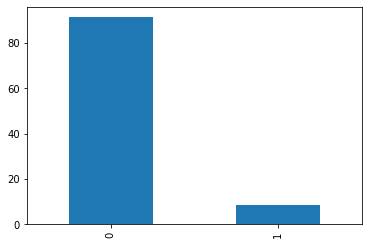

In [45]:
(telecom_hv['Churn'].value_counts(normalize=True)*100).plot.bar()
plt.show()

<a> **We can see there is a class imbalance in the churn column, where it is basically dominated by non-churners and churners are only `8.64%`.We need to find a way to tackle this class imbalance later**

In [46]:
telecom_hv.head()

,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_rech_amt_good_phase,Churn,arpu_action_phase,avg_og_mou,avg_ic_mou,tot_rech_num_action_phase,tot_onnet_mou,tot_offnet_mou,tot_t2c
7,16.23,33.49,31.64,23.74,12.59,38.06,422.16,533.91,255.79,60.86,75.14,77.84,0.0,0.18,10.01,4.50,0.00,6.50,0.00,0.0,0.0,427.88,355.23,188.04,180.54,173.08,193.94,0.21,0.0,0.0,2.06,14.53,31.59,15.74,15.19,15.14,3638,1580,790,1580,0,0,779,0.0,0.0,0.00,0.0,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,802,57.74,19.38,18.74,0.0,1185.0,1,5590.510,482.31,537.75,17,164.81,1346.50,0.00
8,0.00,0.00,0.00,0.00,0.00,0.00,378.09,288.18,63.04,130.26,143.48,98.28,0.0,0.00,0.00,0.00,0.00,10.23,0.00,0.0,0.0,81.43,23.83,15.79,22.43,4.66,0.75,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,120,90,154,30,50,0,10,0.0,356.0,0.03,0.0,750.95,11.94,0,1,0,0,1,3,0,0,0,0,0,0,315,21.03,910.65,122.16,0.0,519.0,0,1008.306,370.53,49.63,54,799.80,311.77,7.15
13,23.53,144.24,72.11,7.98,35.26,1.44,205.31,53.48,353.99,701.78,138.93,655.18,0.0,0.00,1.29,0.00,0.00,4.78,0.00,0.0,0.0,215.58,26.11,255.26,423.81,68.09,474.41,0.45,0.0,0.0,245.28,62.11,393.39,83.48,16.24,21.44,717,110,110,130,110,50,0,0.0,0.0,0.02,0.0,0.00,0.00,0,0,0,0,0,3,0,0,0,0,0,0,2607,0.00,0.00,0.00,0.0,380.0,0,1291.777,704.92,761.91,21,1144.39,1015.05,0.49
16,0.00,2.83,0.00,0.00,17.74,0.00,315.91,215.64,205.93,30.89,67.09,21.53,0.0,0.00,0.00,0.00,3.26,5.91,0.00,0.0,0.0,276.86,229.83,211.78,87.99,151.73,82.44,0.00,0.0,0.0,0.00,0.00,0.23,0.00,0.00,0.00,160,110,110,130,100,100,130,0.0,0.0,0.00,0.0,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,511,0.00,2.45,21.89,0.0,459.0,0,918.738,288.73,346.96,18,195.13,688.79,0.00
17,0.00,4.76,4.81,0.00,8.46,13.34,97.54,0.00,0.00,1148.46,0.81,0.00,0.0,0.00,0.00,2.58,0.00,0.00,0.93,0.0,0.0,81.96,2.31,0.00,9.91,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,30,110,0,30,30,0,0,0.0,0.0,0.00,0.0,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,667,0.00,0.00,0.00,0.0,408.0,0,734.487,416.78,31.40,25,1202.98,67.18,0.00


<a> Let's drop duplicates if any

In [47]:
telecom_hv.drop_duplicates()
telecom_hv.shape

(30011, 75)

In [48]:
telecom_hv.shape

(30011, 75)

**Let's split the data into train and test first, then look for some more feature engineering, transformation, scaling and handling class imbalance**

In [49]:
# Creating x and y variables
y = telecom_hv["Churn"]
X = telecom_hv.drop('Churn',axis=1)

### Train and Test Split

In [50]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y, train_size=0.7, test_size=0.3, random_state=100)
#70% as train data and 30% as test data

In [51]:
#Let's check the shape of it
print(X_train.shape)
print(y_train.shape)

(21007, 74)
(21007,)


In [52]:
X_train.describe()

,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_rech_amt_good_phase,arpu_action_phase,avg_og_mou,avg_ic_mou,tot_rech_num_action_phase,tot_onnet_mou,tot_offnet_mou,tot_t2c
count,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000
mean,18.004726,13.960645,13.932303,29.699117,22.335201,21.736684,284.307012,284.309117,264.695274,393.484687,417.652305,355.187054,2.233480,2.199308,2.058817,5.884670,7.451860,6.863892,0.688854,0.055237,0.077146,246.285513,251.020639,239.447897,50.778063,53.306725,48.818322,0.067334,0.018979,0.028185,11.178794,12.379671,11.597304,1.221473,1.488206,1.220488,615.741277,172.442567,176.654972,163.583234,105.513781,105.369686,95.403342,78.969615,77.945984,70.067954,256.700680,282.180077,273.378201,0.126196,0.130385,0.113676,0.497977,0.581758,0.613510,0.173514,0.187557,0.177417,0.137811,0.145761,0.143000,1269.562051,129.231815,137.065755,120.801012,6.418204,697.272195,1713.886409,674.381387,307.846859,34.304280,875.015730,1221.338601,5.067756
std,81.947759,81.854092,80.469828,116.513807,98.872352,103.768351,383.208680,380.368296,374.403640,605.039675,644.222391,626.844698,46.665972,45.638565,45.306978,18.820555,24.083835,23.020706,2.277072,3.220383,3.951331,315.982906,322.235085,310.881387,140.775467,150.065940,145.604640,0.208728,0.206679,0.113178,68.456484,79.748074,76.083752,15.367668,16.583151,12.826252,564.246470,178.720020,185.429144,175.232668,146.688817,141.483763,147.192866,272.037872,280.167239,272.921560,836.893149,859.452656,871.890571,0.377561,0.388830,0.359084,1.696023,1.898091,1.879411,0.573318,0.621469,0.588124,0.896958,0.961054,1.043846,976.507036,392.014211,414.978600,388.821443,48.516874,453.112444,1133.222988,594.807633,339.878018,25.175103,1278.811057,1269.014415,16.648750
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000

<a> Look's like almost all the columns have outliers in them. We can use transformation or capping techniques to smoothen the data.

**Let's check for distribution of the numeric data**

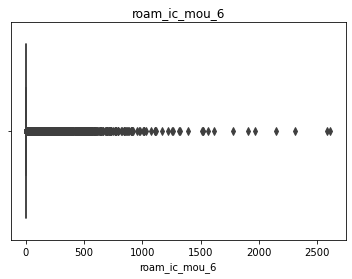

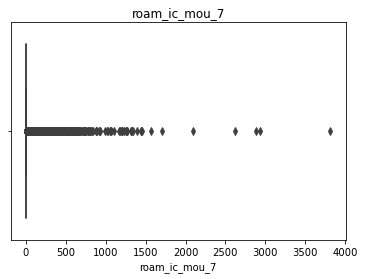

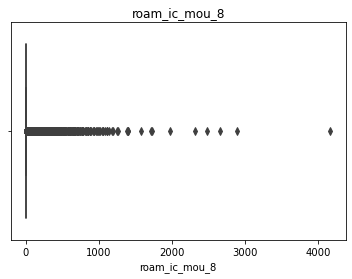

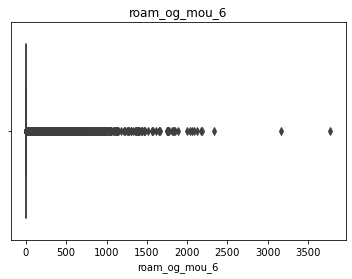

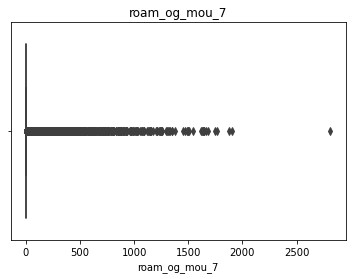

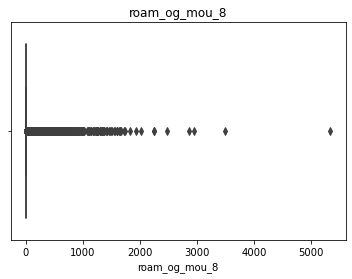

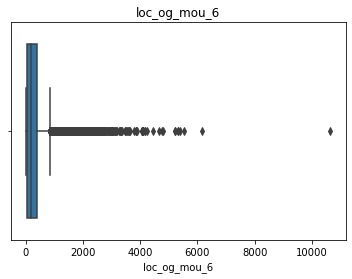

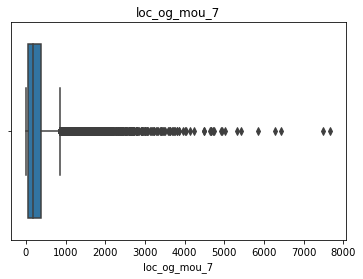

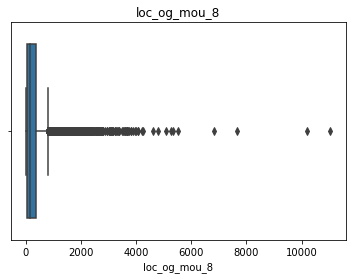

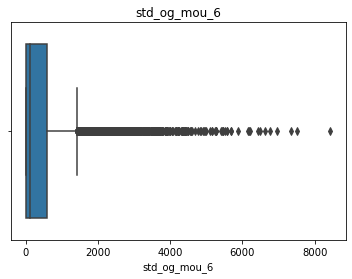

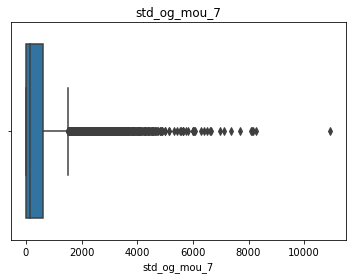

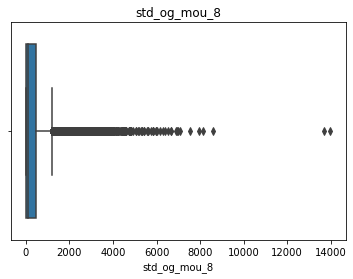

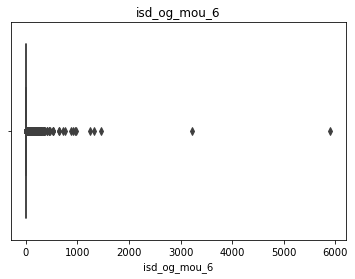

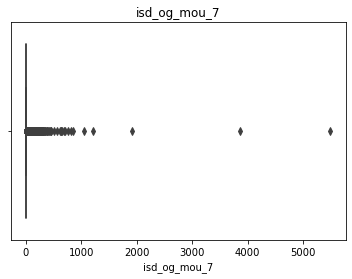

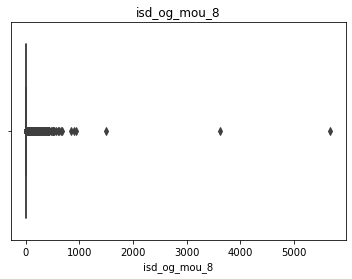

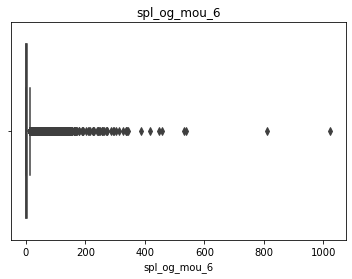

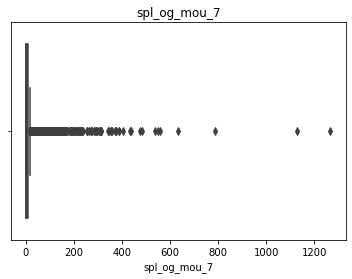

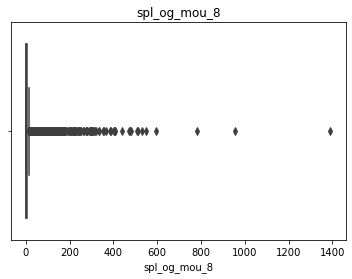

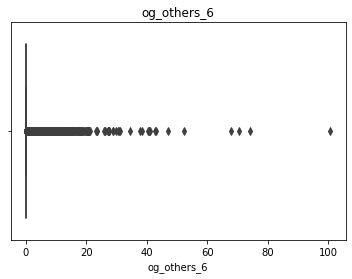

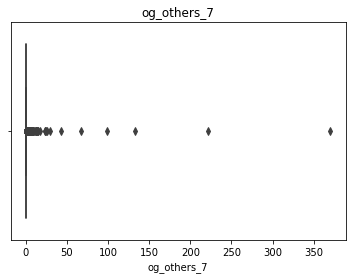

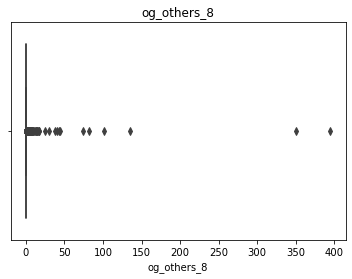

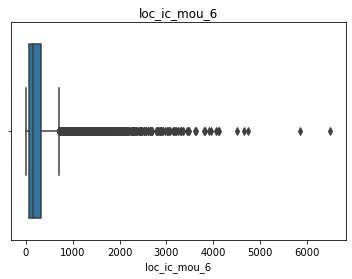

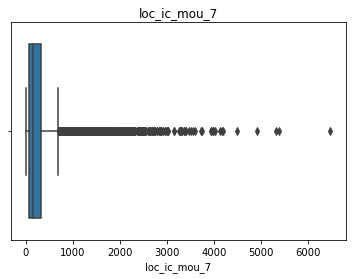

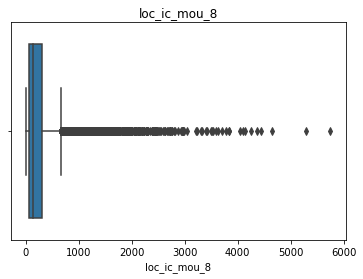

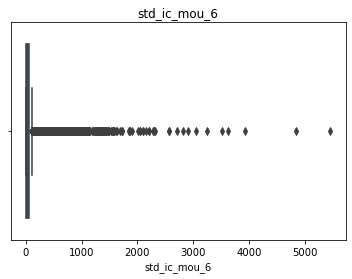

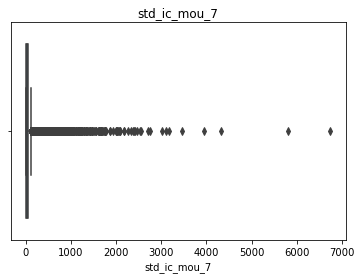

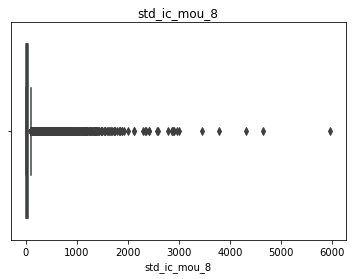

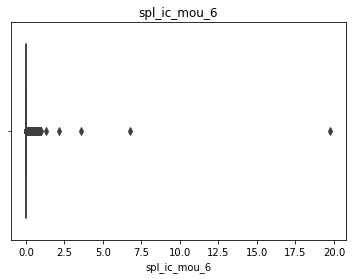

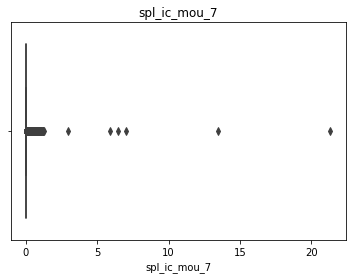

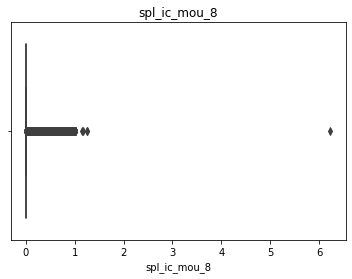

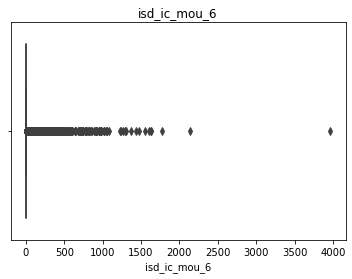

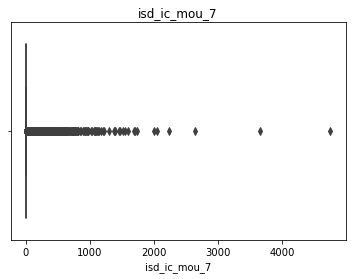

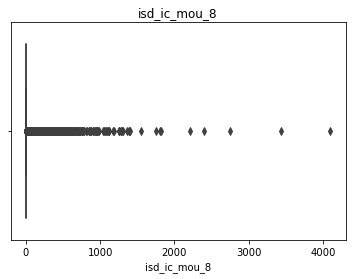

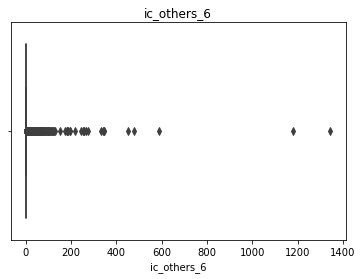

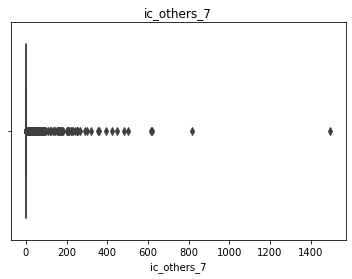

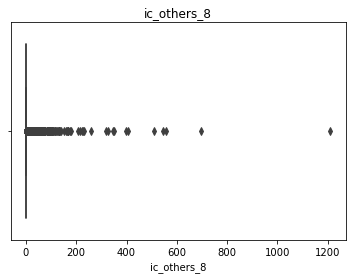

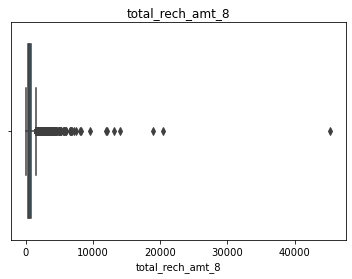

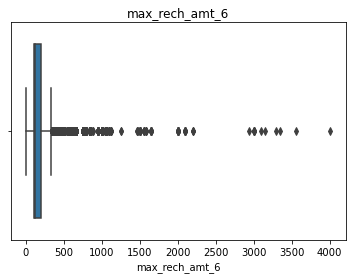

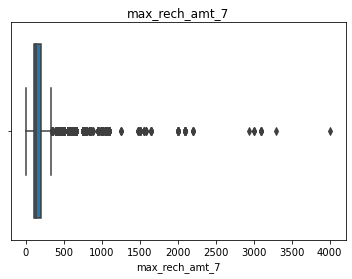

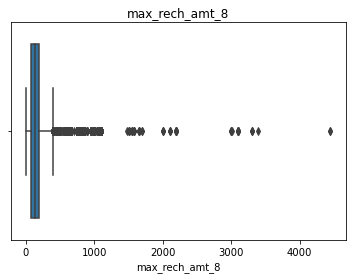

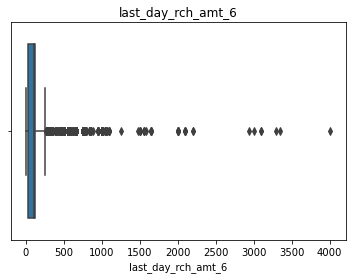

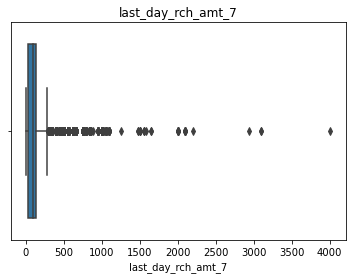

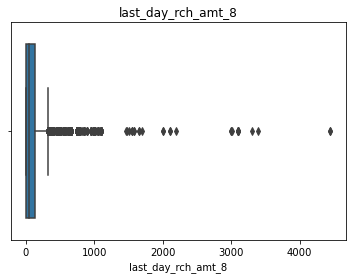

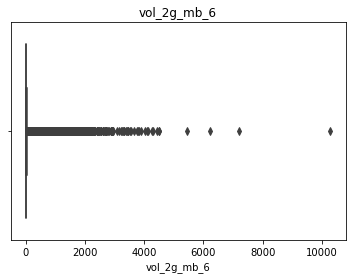

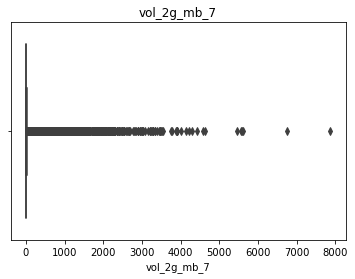

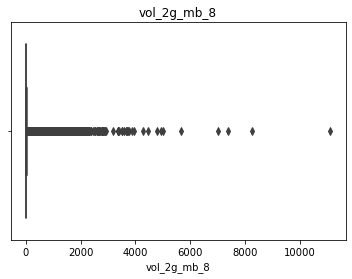

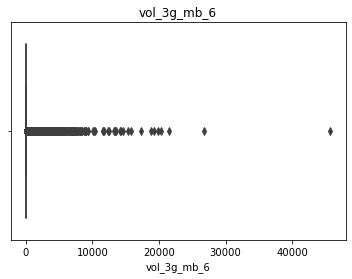

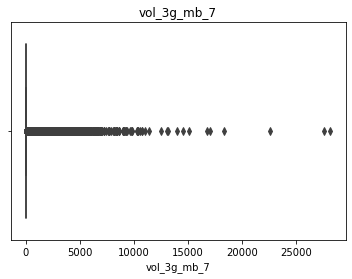

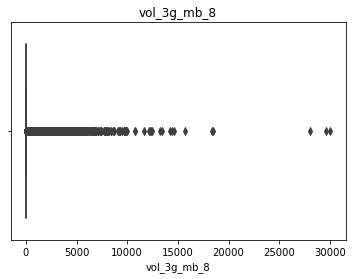

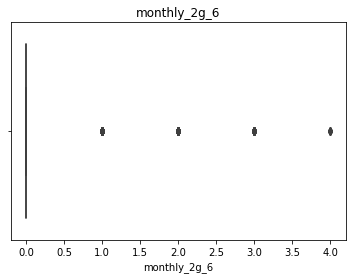

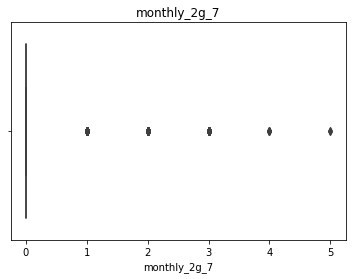

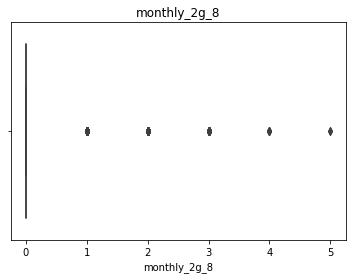

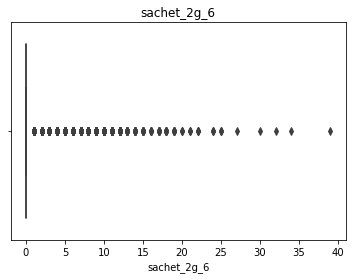

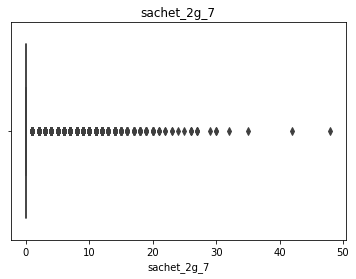

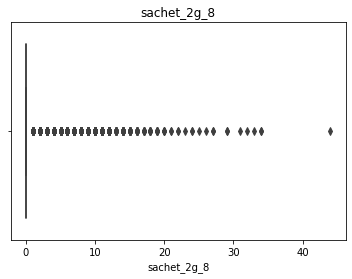

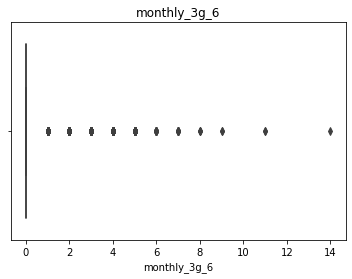

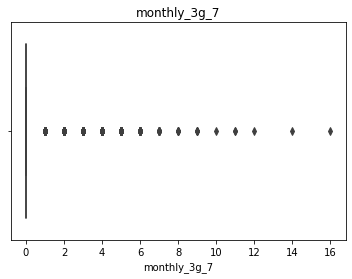

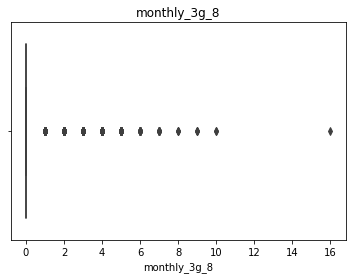

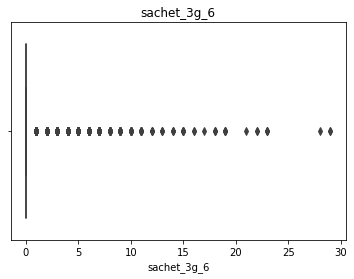

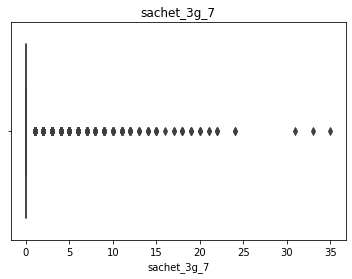

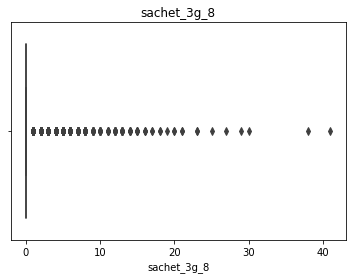

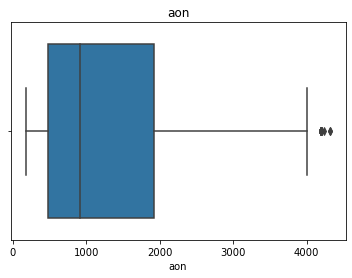

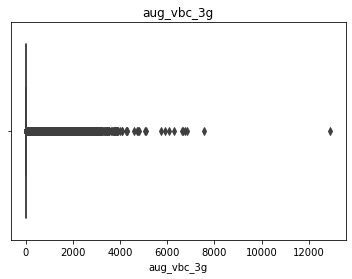

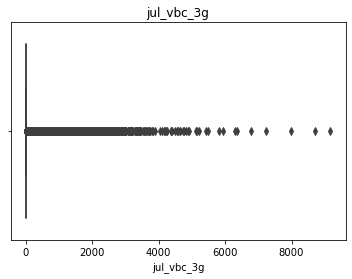

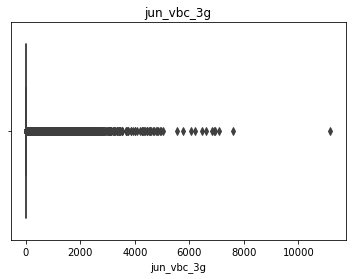

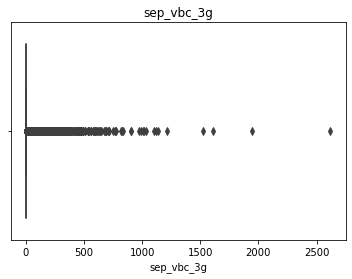

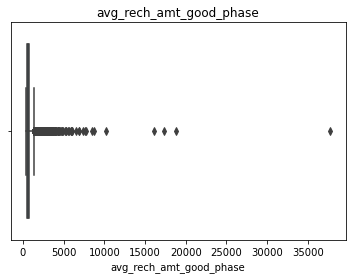

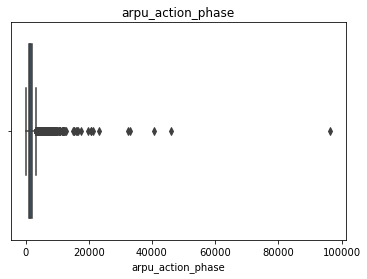

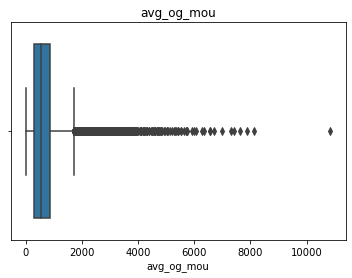

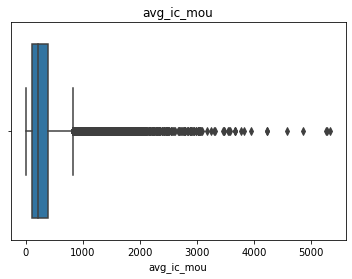

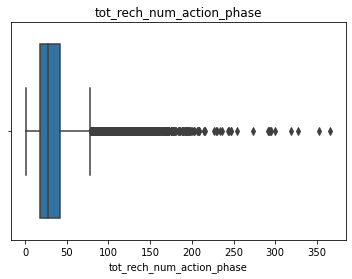

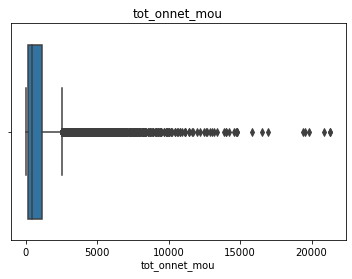

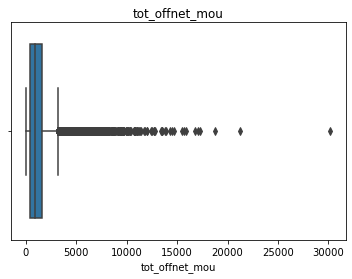

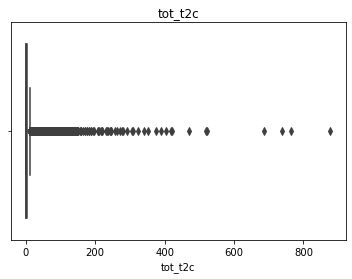

In [53]:
for i in X_train.select_dtypes(include=['int64','float64']).columns:
    plt.title(i)
    sns.boxplot(telecom_hv[i])
    plt.show()

<a>**If we look closely in the above plots, only apart from the `aon` column almost all the columns have outliers and need transformation.**

<a> Let's confirm the above findings with other distribution plots.

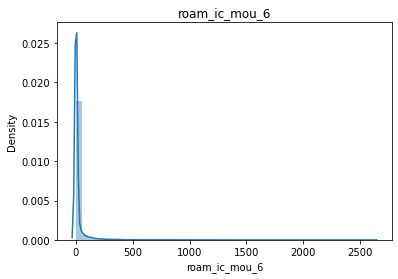

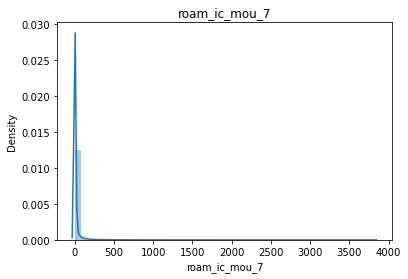

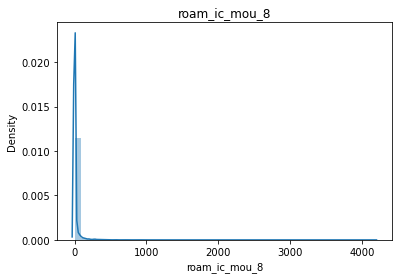

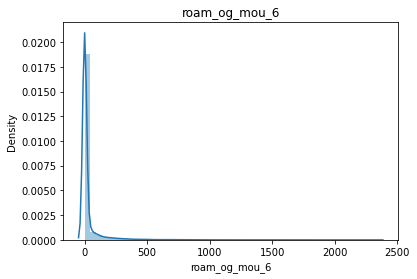

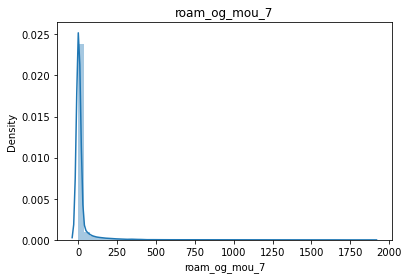

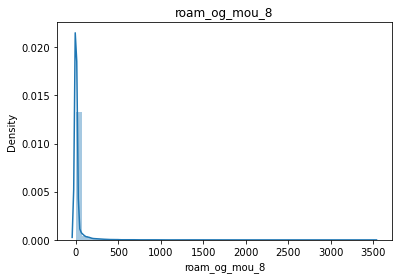

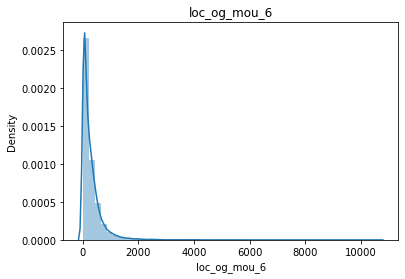

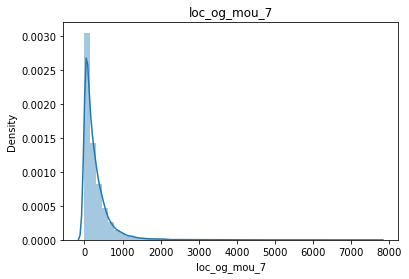

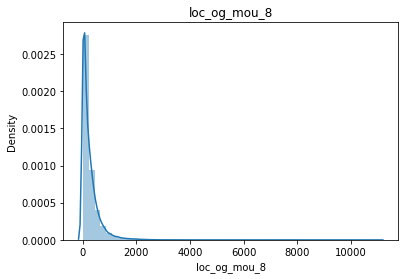

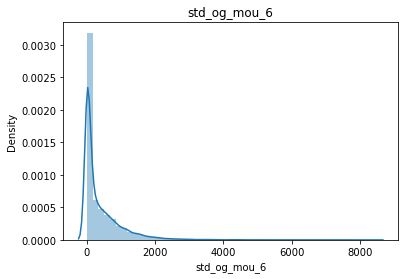

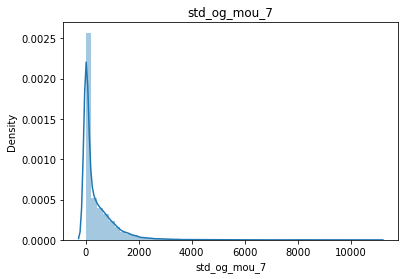

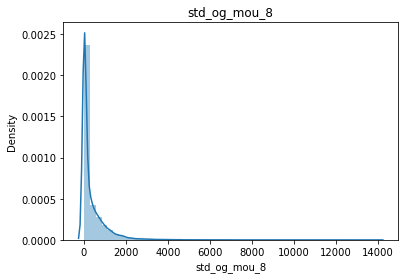

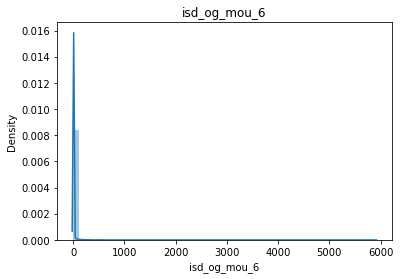

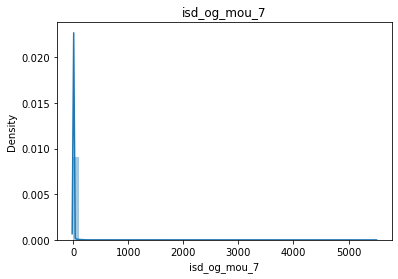

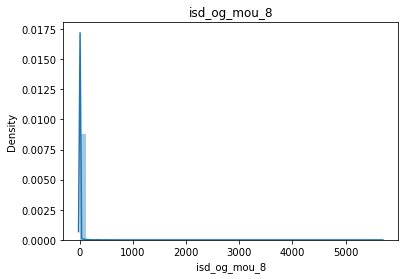

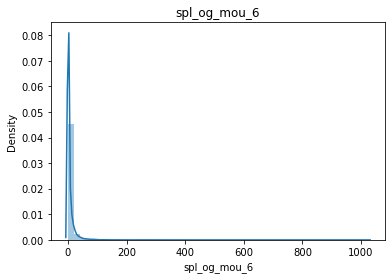

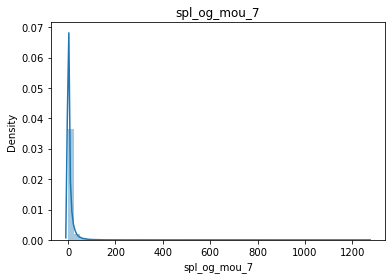

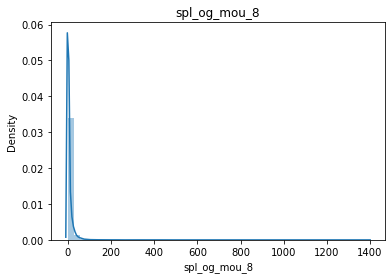

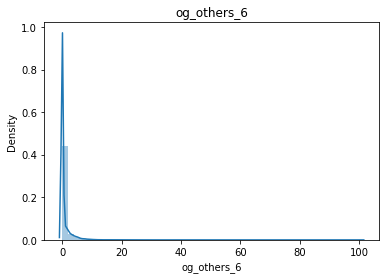

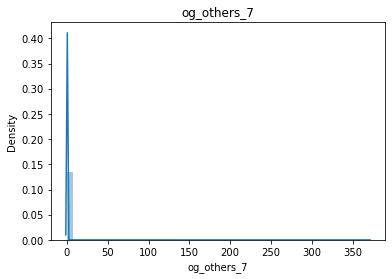

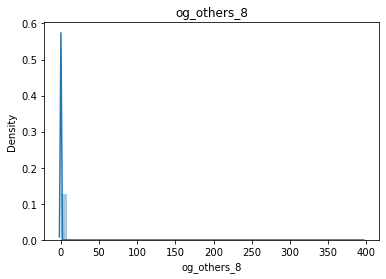

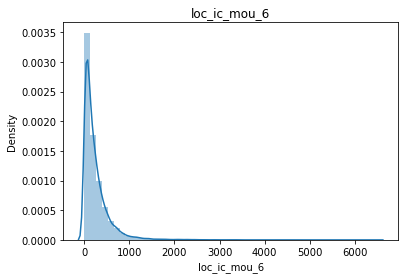

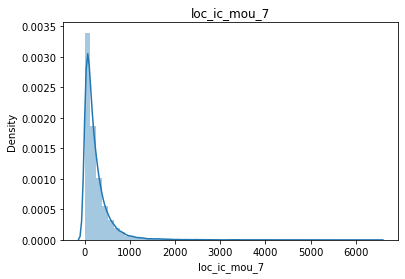

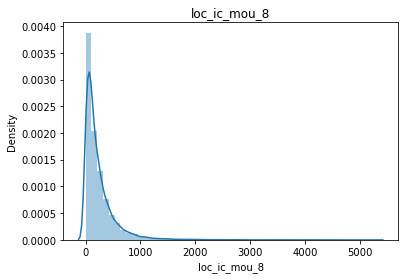

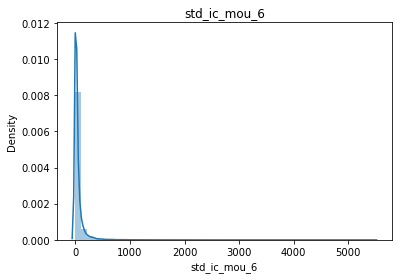

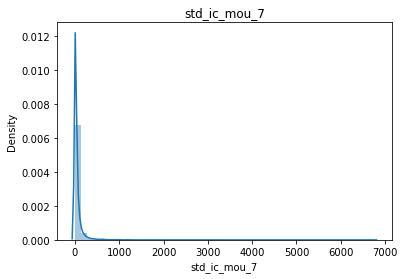

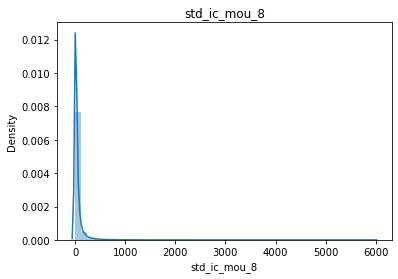

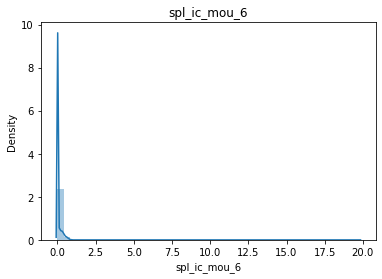

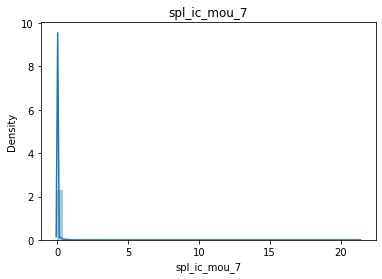

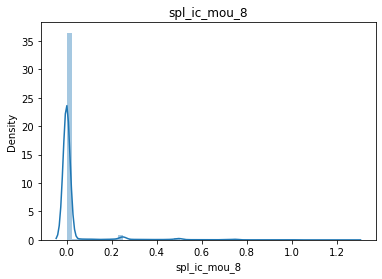

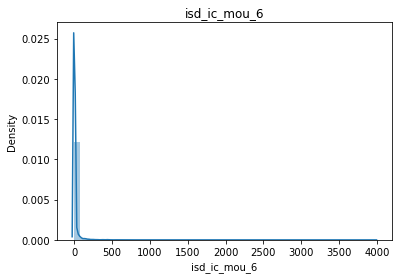

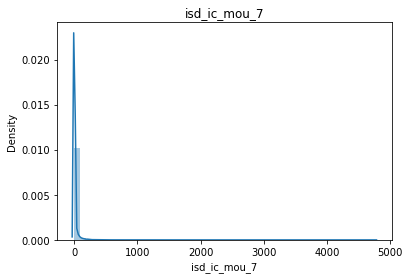

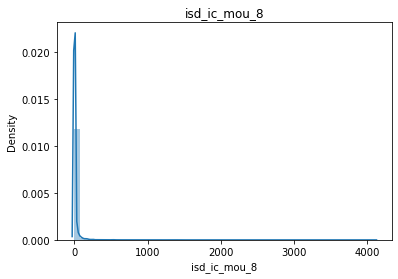

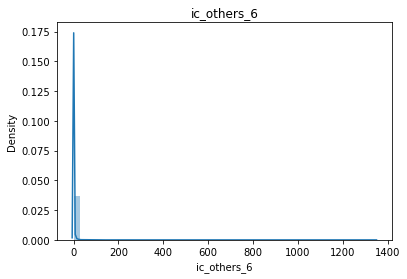

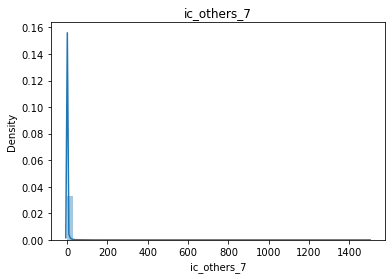

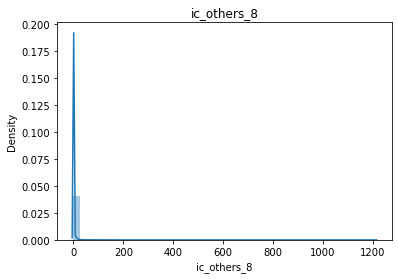

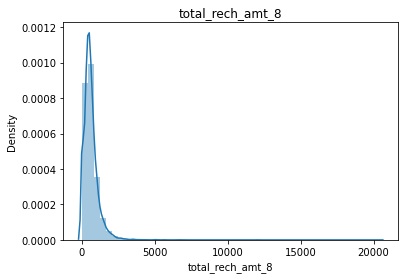

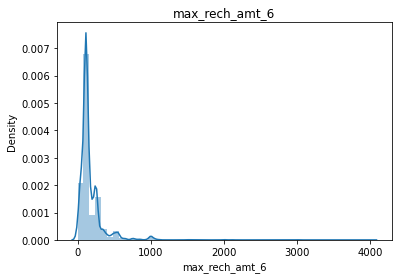

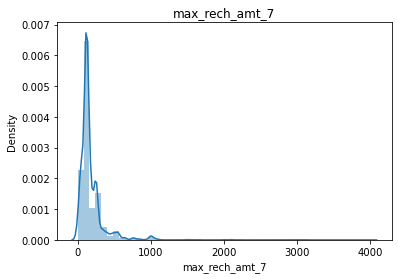

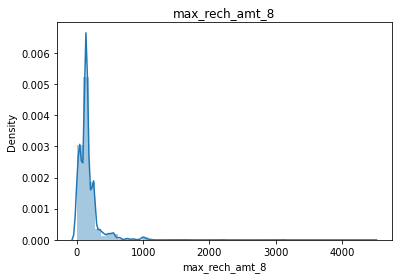

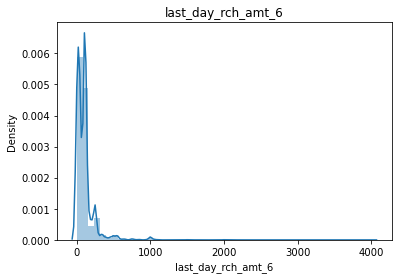

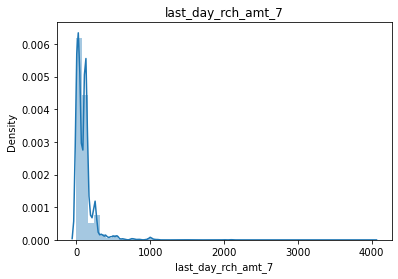

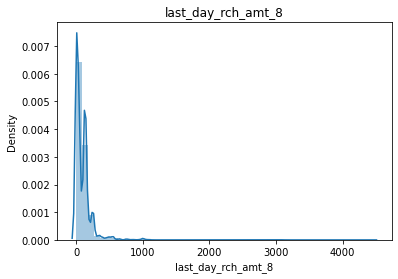

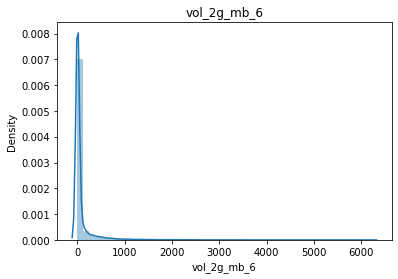

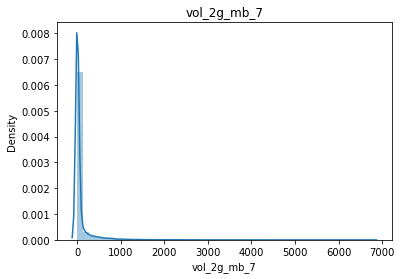

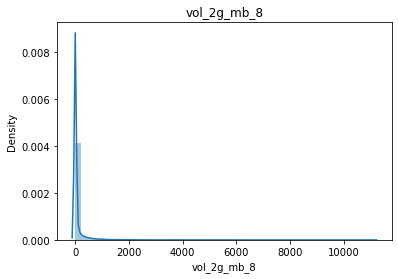

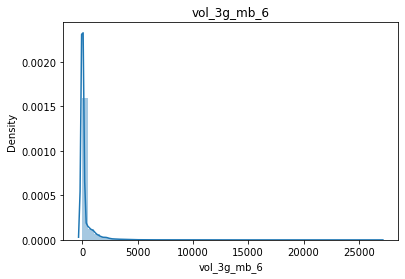

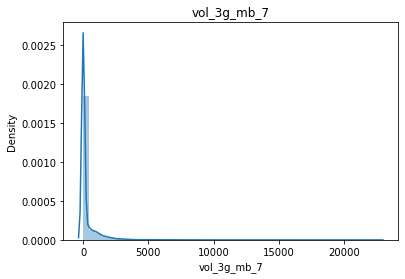

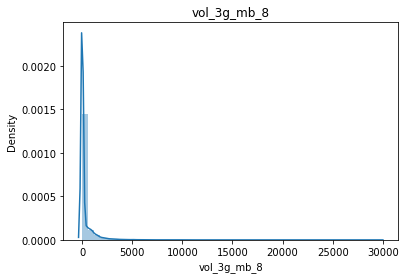

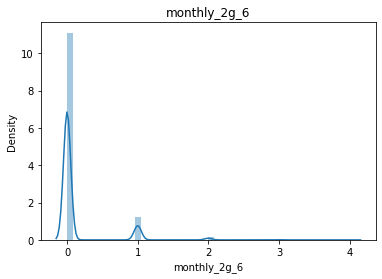

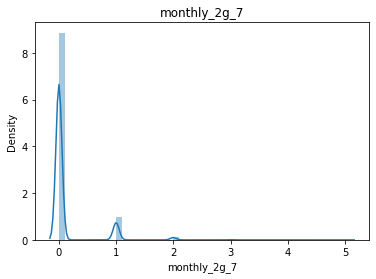

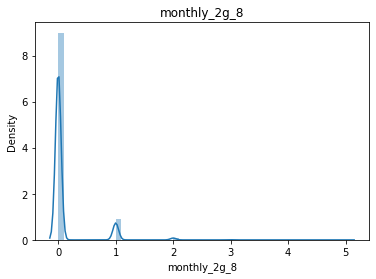

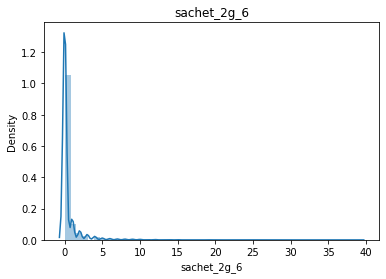

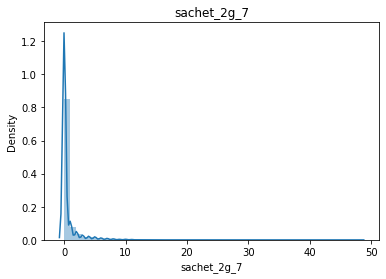

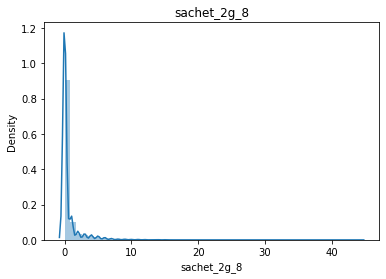

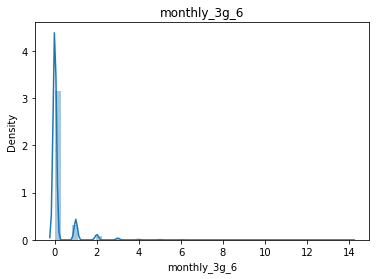

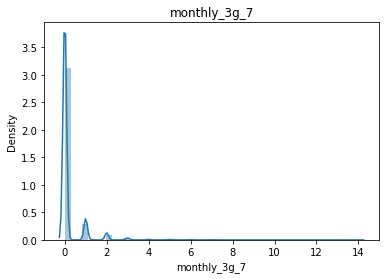

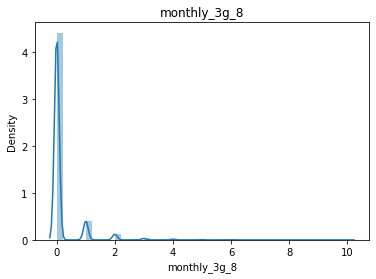

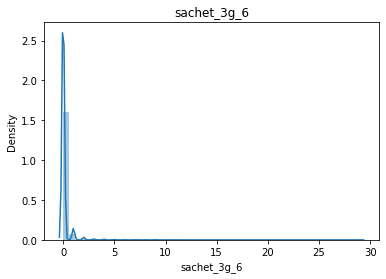

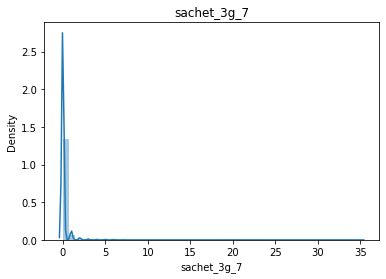

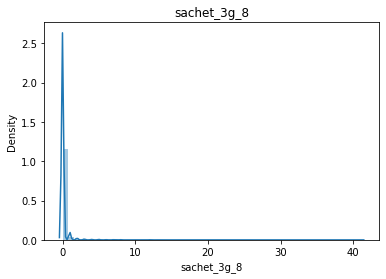

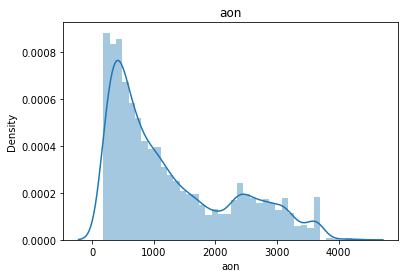

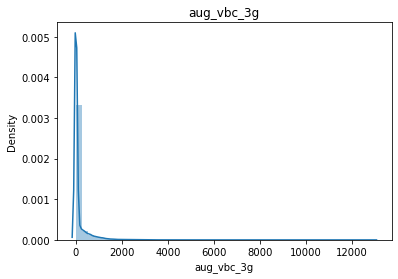

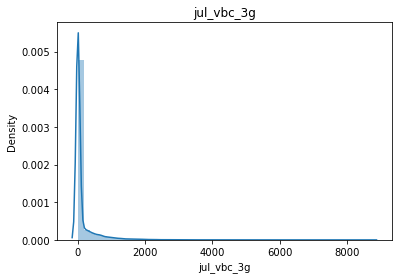

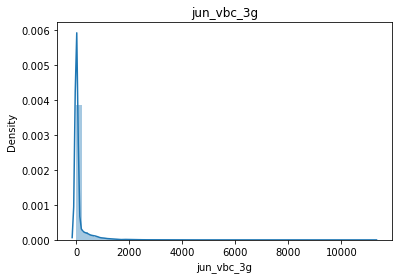

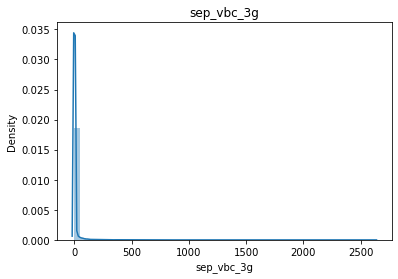

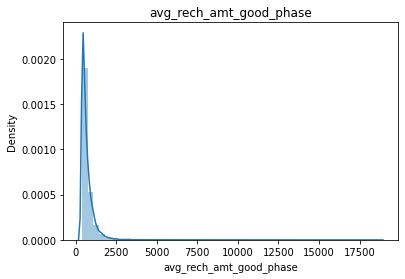

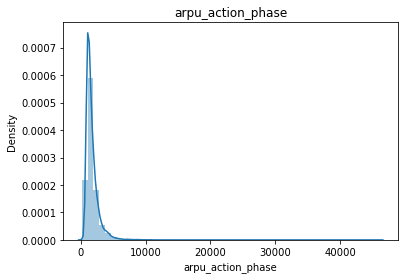

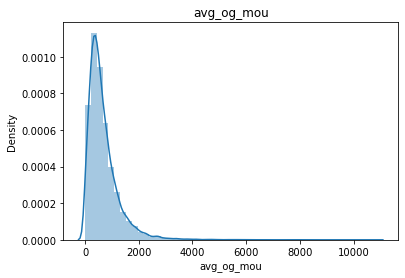

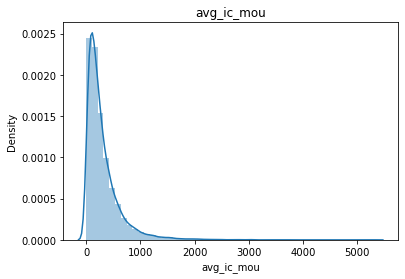

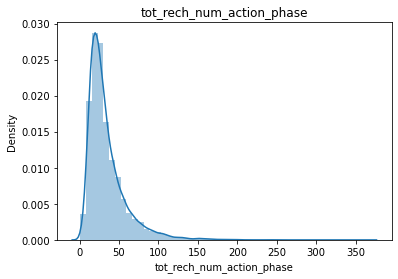

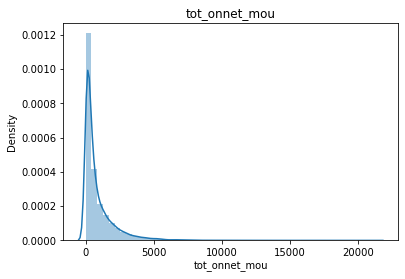

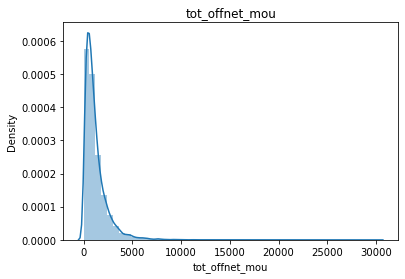

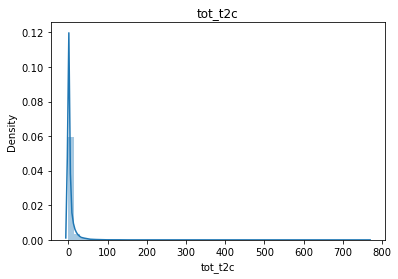

In [54]:
for i in X_train.select_dtypes(include=['int64','float64']).columns:
    plt.title(i)
    sns.distplot(X_train[i])
    plt.show()

<a> We can see the same thing in the distplots as well, all the columns look extremely skewed. Let's apply some transformation on the columns.
    

### Feature Transformation

In [55]:
from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer()

In [56]:
for i in X_train.select_dtypes(include=['int64','float64']).columns:
    X_train[i] = pt.fit_transform(X_train[[i]])

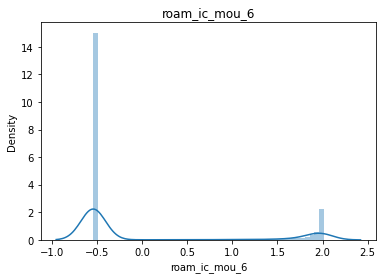

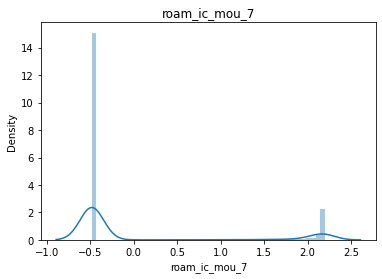

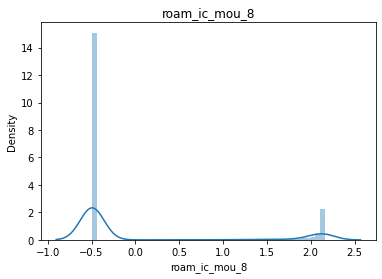

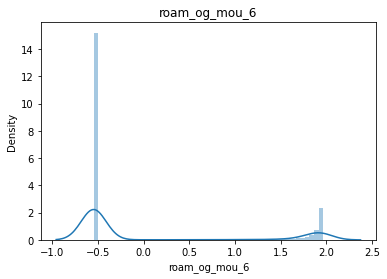

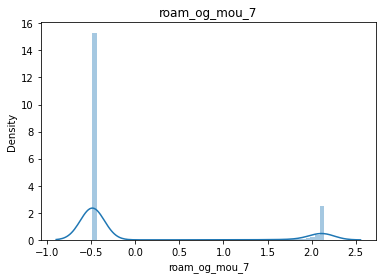

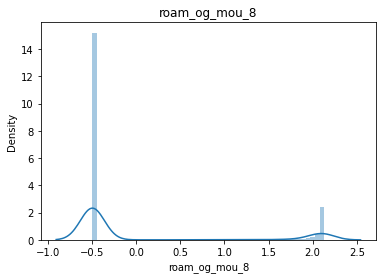

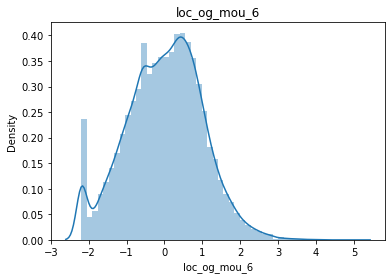

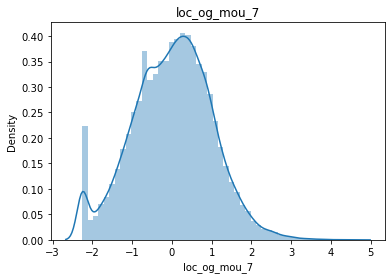

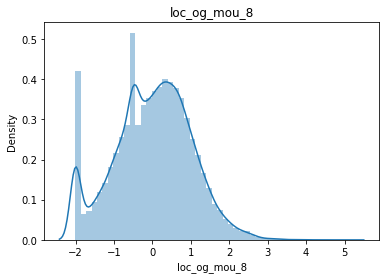

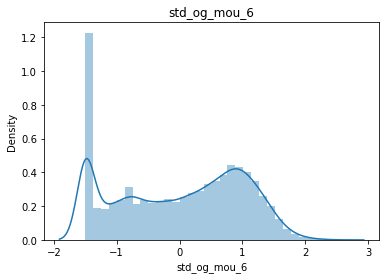

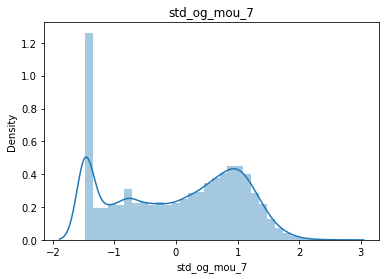

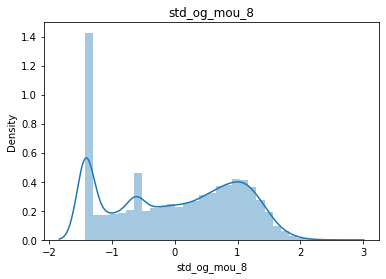

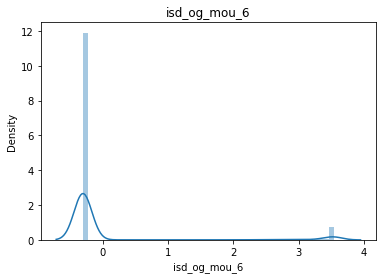

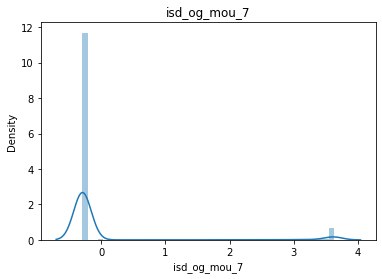

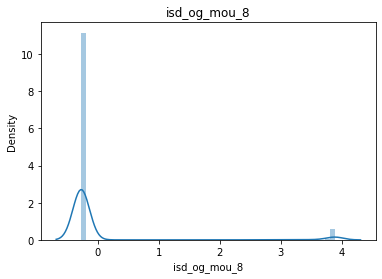

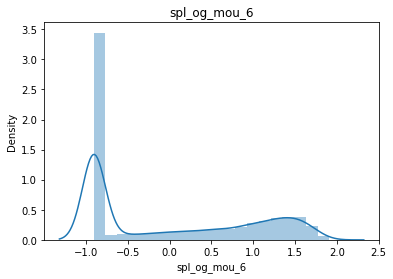

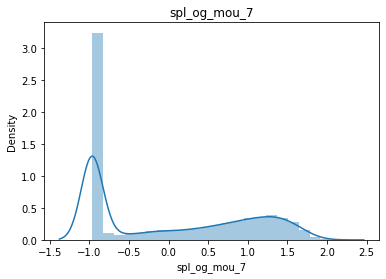

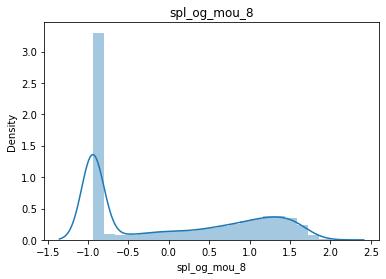

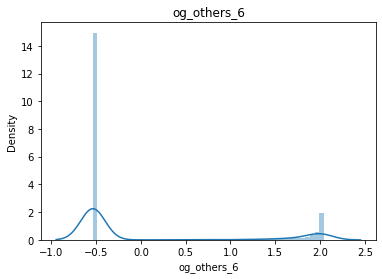

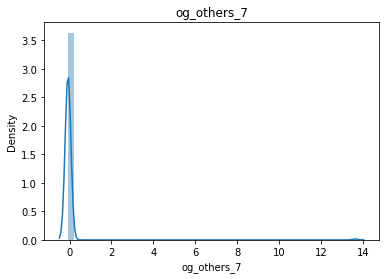

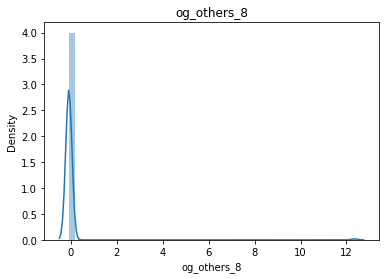

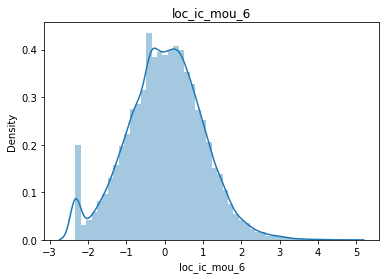

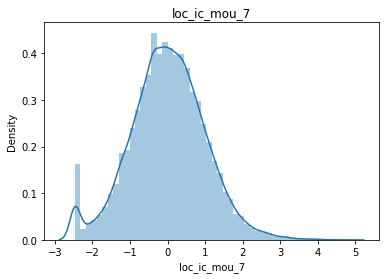

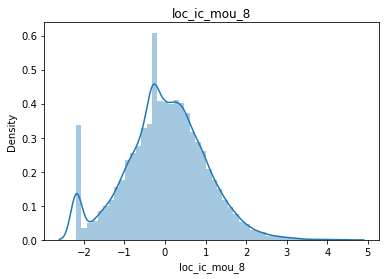

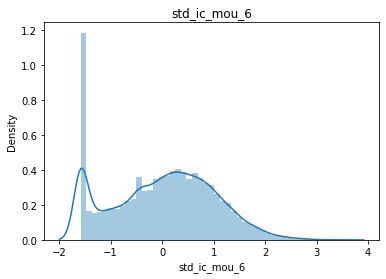

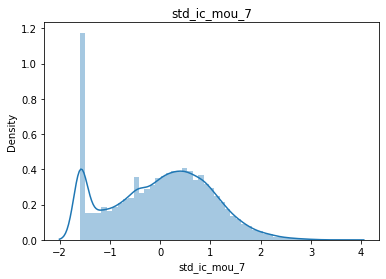

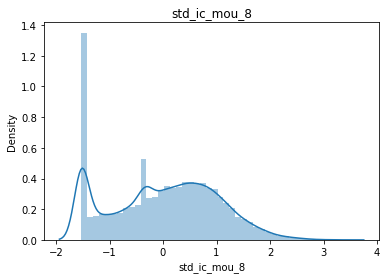

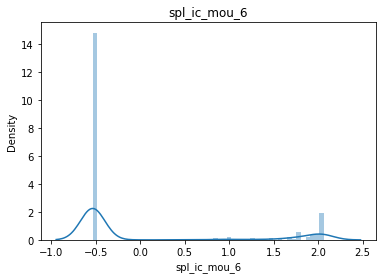

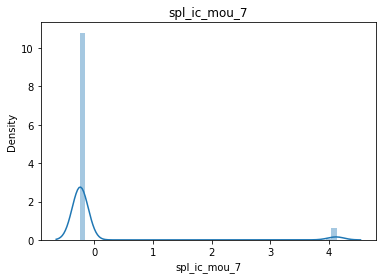

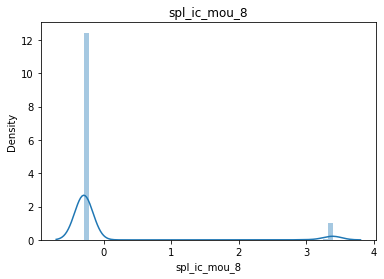

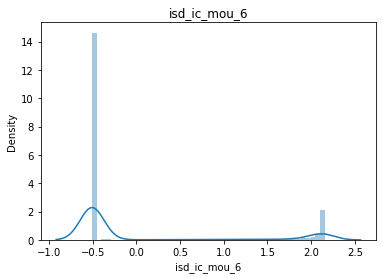

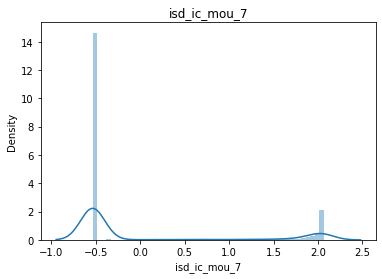

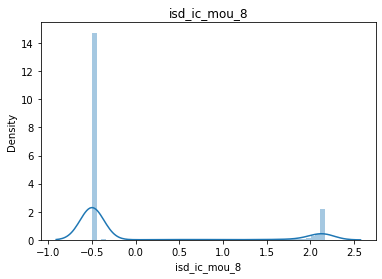

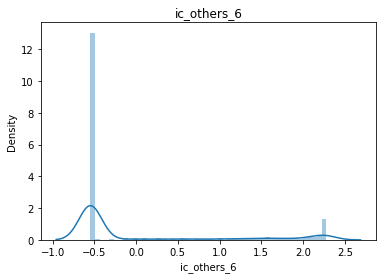

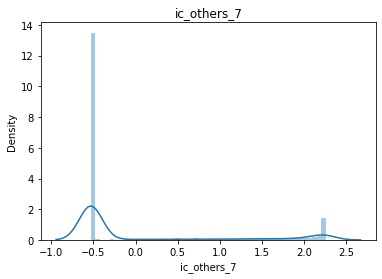

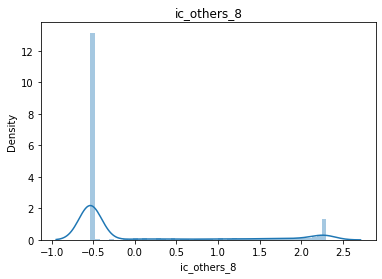

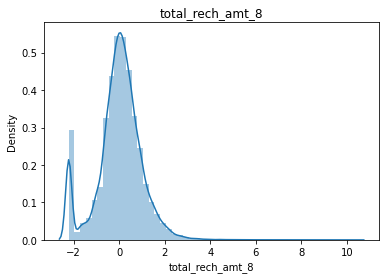

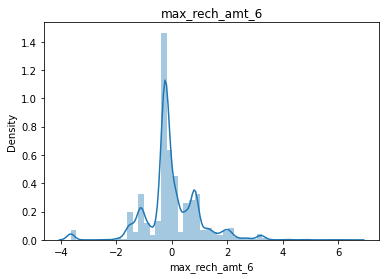

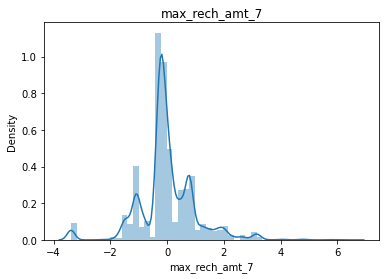

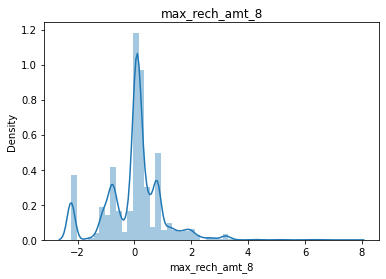

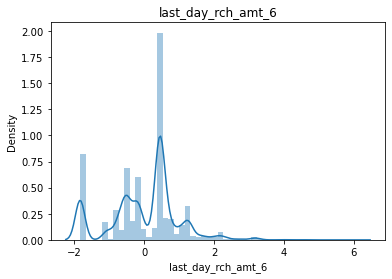

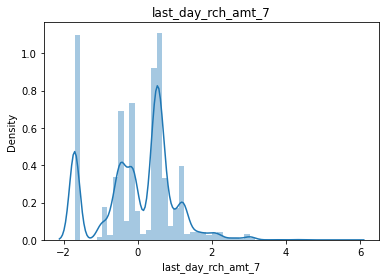

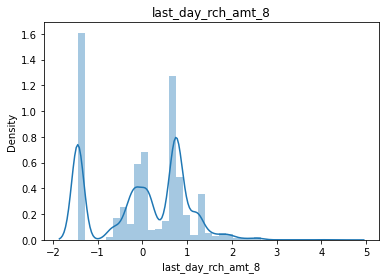

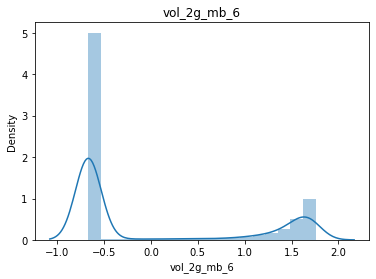

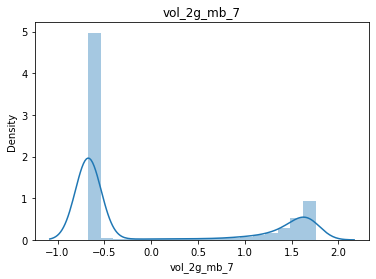

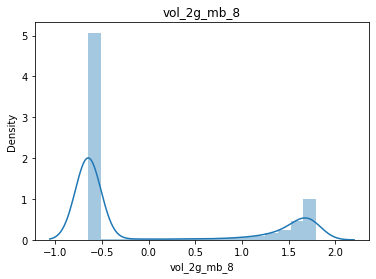

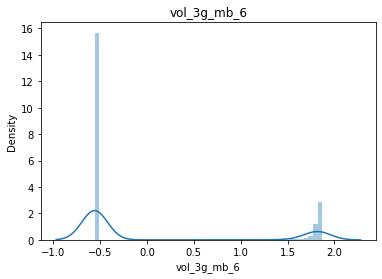

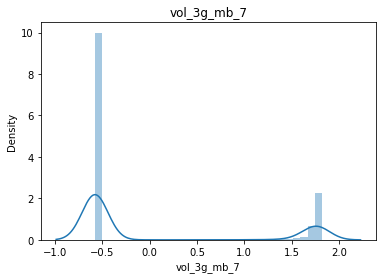

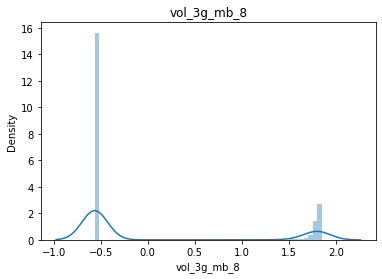

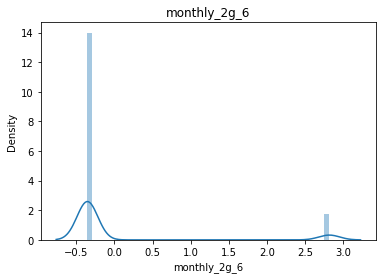

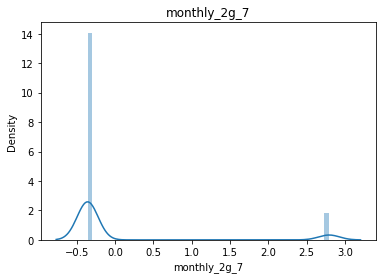

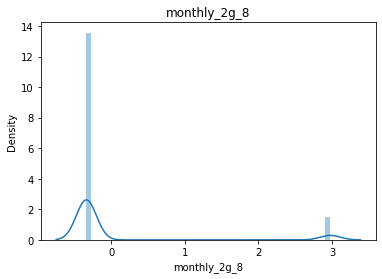

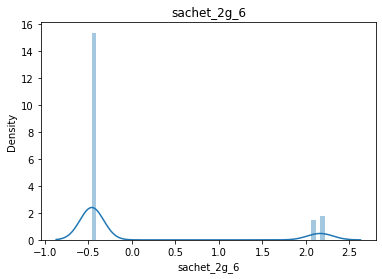

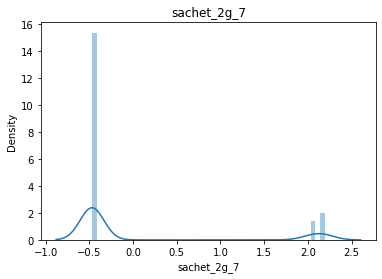

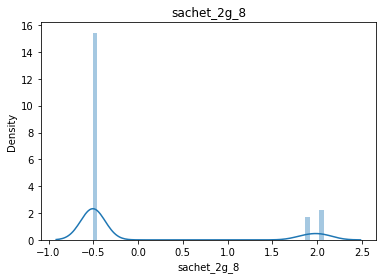

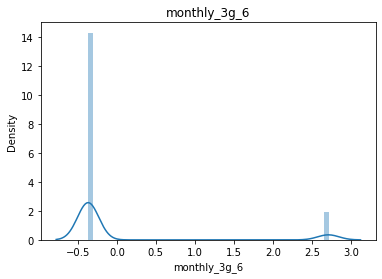

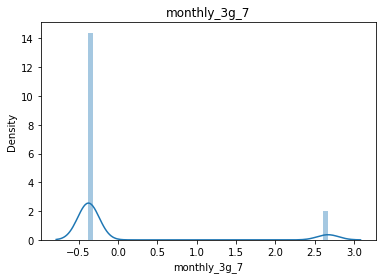

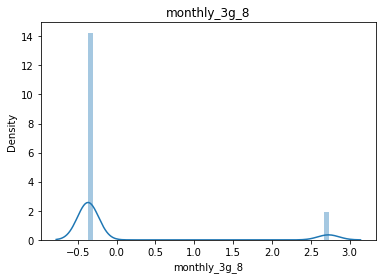

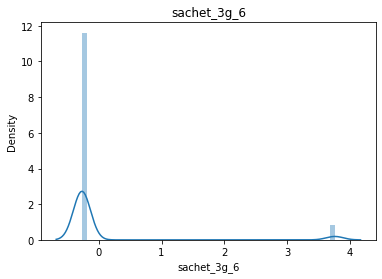

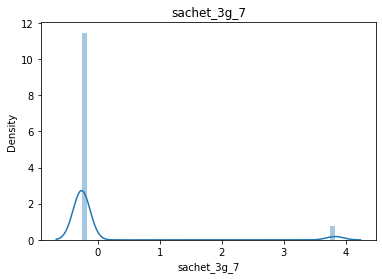

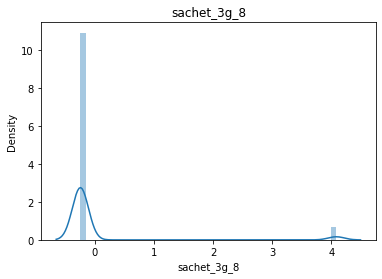

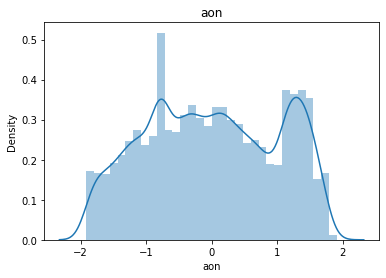

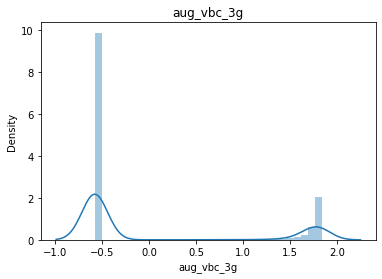

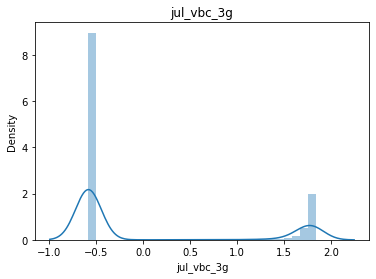

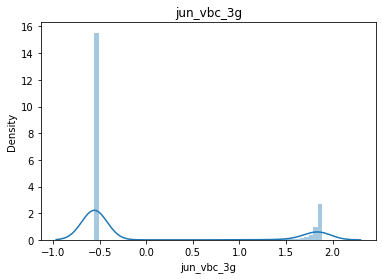

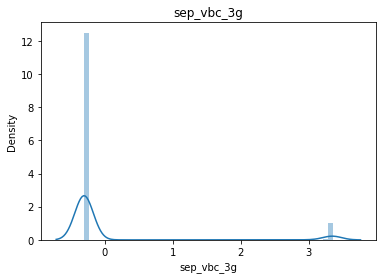

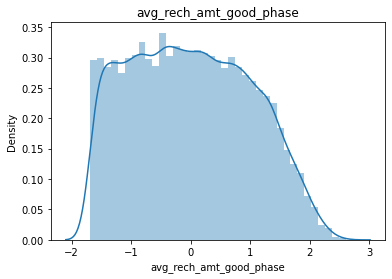

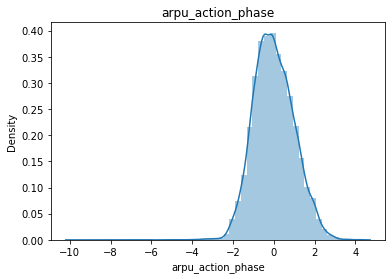

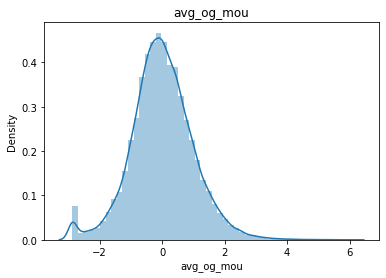

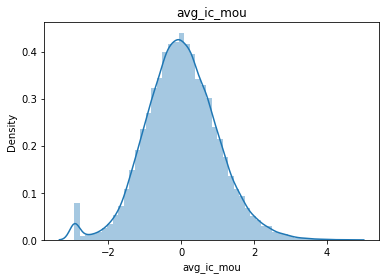

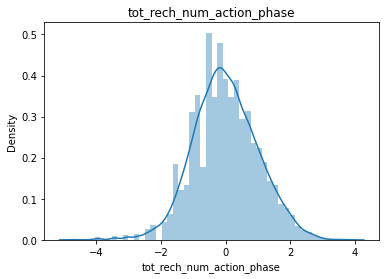

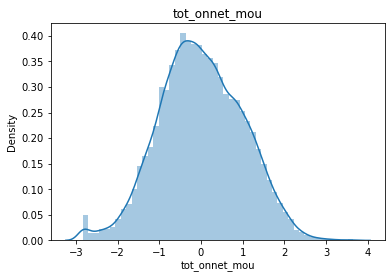

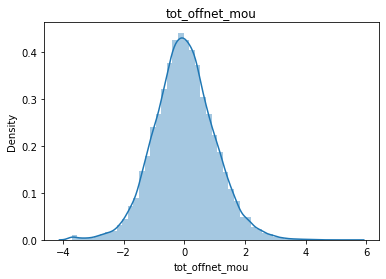

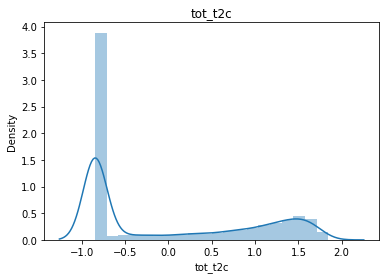

In [57]:
for i in X_train.select_dtypes(include=['int64','float64']).columns:
    plt.title(i)
    sns.distplot(X_train[i])
    plt.show()

<a> As observed, the plots have more normalized now, meaning the columns are more normally distributed now. Let's verify this using the describe function.

In [58]:
X_train.describe()

,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_rech_amt_good_phase,arpu_action_phase,avg_og_mou,avg_ic_mou,tot_rech_num_action_phase,tot_onnet_mou,tot_offnet_mou,tot_t2c
count,2.100700e+04,2.100700e+04,2.100700e+04,2.100700e+04,2.100700e+04,2.100700e+04,2.100700e+04,2.100700e+04,2.100700e+04,2.100700e+04,2.100700e+04,2.100700e+04,2.100700e+04,2.100700e+04,2.100700e+04,2.100700e+04,2.100700e+04,2.100700e+04,2.100700e+04,2.100700e+04,2.100700e+04,2.100700e+04,2.100700e+04,2.100700e+04,2.100700e+04,2.100700e+04,2.100700e+04,2.100700e+04,2.100700e+04,2.100700e+04,2.100700e+04,2.100700e+04,2.100700e+04,2.100700e+04,2.100700e+04,2.100700e+04,2.100700e+04,2.100700e+04,2.100700e+04,2.100700e+04,2.100700e+04,2.100700e+04,2.100700e+04,2.100700e+04,2.100700e+04,2.100700e+04,2.100700e+04,2.100700e+04,2.100700e+04,2.100700e+04,2.100700e+04,2.100700e+04,2.100700e+04,2.100700e+04,2.100700e+04,2.100700e+04,2.100700e+04,2.100700e+04,2.100700e+04,2.100700e+04,2.100700e+04,2.100700e+04,2.100700e+04,2.100700e+04,2.100700e+04,2.100700e+04,2.100700e+04,2.100700e+04,2.100700e+04,2.100700e+04,2.100700e+04,2.100700e+04,2.100700e+04,2.100700e+04
mean,3.628163e-16,-8.093419e-16,3.819427e-16,-9.359761e-17,-3.019170e-16,1.480015e-16,3.036769e-17,4.091183e-16,-1.911061e-17,1.426531e-16,4.188691e-16,-1.242824e-16,6.195570e-16,1.620433e-15,1.291023e-15,5.814626e-16,-1.106455e-15,3.564637e-16,1.906453e-15,-2.812526e-16,-1.513164e-15,-2.435335e-17,4.529363e-16,-1.684017e-16,2.369774e-16,1.554851e-17,6.051342e-17,-2.753588e-15,6.771161e-16,8.042207e-17,-2.903587e-17,-4.525875e-16,1.106249e-15,-1.673870e-16,2.982334e-16,4.722478e-16,6.251941e-17,-4.193659e-16,-2.029201e-16,-2.661345e-16,4.434022e-16,8.192830e-17,1.418445e-16,7.246389e-16,6.236423e-16,8.469447e-16,-7.532097e-16,-2.237464e-16,-5.880741e-16,-7.268481e-17,8.588413e-16,-1.105990e-15,8.140825e-16,7.052482e-16,4.422500e-17,1.569929e-15,-2.714436e-16,8.505016e-16,4.165014e-16,4.978272e-16,-8.776903e-16,1.450324e-15,-8.444291e-16,-5.886766e-16,7.795291e-16,-1.222952e-16,1.626792e-13,1.753678e-14,-2.169756e-16,1.469234e-16,-1.931111e-16,-3.079287e-16,-5.064220e-16,1.294353e-16
std,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00
min,-5.402756e-01,-4.805845e-01,-4.932094e-01,-5.471618e-01,-4.869647e-01,-4.950571

<a> As we can see, powertransformation has taken care of the outliers as well.

In [59]:
X_train.head()

,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_rech_amt_good_phase,arpu_action_phase,avg_og_mou,avg_ic_mou,tot_rech_num_action_phase,tot_onnet_mou,tot_offnet_mou,tot_t2c
4715,-0.540276,-0.480584,-0.493209,-0.547162,-0.486965,-0.495057,-1.840104,-1.727223,-1.306056,0.752928,0.880326,0.915913,-0.300414,-0.291874,-0.269771,1.639266,1.007619,0.602270,-0.536109,-0.07353,-0.081521,-1.493738,-1.135741,-1.609586,1.238936,1.276694,1.503874,1.766357,-0.243714,-0.298240,-0.507966,-0.535549,-0.502164,-0.547282,-0.531631,-0.535222,-0.105866,-1.577175,-0.758754,-0.775052,-1.836760,-0.654455,-0.655087,-0.66906,1.665010,-0.650971,-0.557425,-0.577487,-0.564138,-0.354651,-0.358298,-0.33591,-0.46188,2.037650,-0.504873,-0.368705,-0.37476,-0.366786,-0.26619,-0.261338,-0.244941,-1.151079,-0.578501,-0.578803,-0.557141,-0.304102,-0.737488,-0.481204,0.021675,-0.309472,1.395422,0.862292,-0.957756,1.392269
15222,-0.540276,-0.480584,-0.493209,-0.547162,-0.486965,-0.495057,0.567256,-0.094571,0.558915,-1.501917,-1.483603,-1.426983,-0.300414,-0.291874,-0.269771,1.118528,0.532590,0.707911,-0.536109,-0.07353,-0.081521,1.293624,0.536739,1.020613,-0.649659,-0.653457,-1.313814,-0.534695,-0.243714,-0.298240,2.071151,2.001355,2.110338,-0.547282,-0.531631,-0.535222,-0.087828,-0.261947,0.447603,0.500792,0.433816,0.450861,1.045264,-0.66906,1.126660,1.602261,-0.557425,1.631047,1.757888,-0.354651,2.790852,2.97695,-0.46188,-0.470551,-0.504873,-0.368705,-0.37476,-0.366786,-0.26619,-0.261338,-0.244941,0.167076,1.752964,1.674411,1.731371,3.352149,-0.717403,-0.263293,-0.731376,0.800035,-0.978865,-0.304923,-0.537801,-0.849280
60145,-0.540276,-0.480584,-0.493209,-0.547162,-0.486965,-0.495057,0.296034,1.151427,0.997967,-1.501917,-0.792760,-1.326947,3.467039,3.632297,3.861045,-0.906268,-0.969917,-0.943974,-0.536109,-0.07353,-0.081521,-0.055611,0.673972,0.359146,-0.618933,-1.596035,-1.526391,-0.534695,-0.243714,-0.298240,2.155519,2.068347,2.164141,-0.547282,-0.531631,-0.535222,0.296622,-1.577175,-0.175112,-0.775052,-0.511292,0.523810,0.113865,-0.66906,-0.672711,-0.650971,-0.557425,-0.577487,-0.564138,-0.354651,-0.358298,-0.33591,-0.46188,-0.470551,-0.504873,-0.368705,-0.37476,-0.366786,-0.26619,-0.261338,-0.244941,1.095948,-0.578501,-0.578803,-0.557141,-0.304102,0.183381,0.277699,-0.184937,1.587727,0.686524,-0.511093,0.293154,-0.849280
62445,-0.540276,-0.480584,-0.493209,-0.547162,-0.486965,-0.495057,0.622698,1.104078,0.323371,0.766075,0.708788,1.071836,-0.300414,-0.291874,-0.269771,-0.906268,-0.969917,-0.943974,-0.536109,-0.07353,-0.081521,-0.844681,-0.890513,-1.098651,1.174110,0.571806,0.884205,-0.534695,-0.243714,-0.298240,2.074706,-0.535549,-0.502164,-0.547282,-0.531631,-0.535222,0.305894,-1.170598,-1.138650,-0.817884,-0.226136,-0.606740,0.078409,-0.66906,-0.672711,-0.650971,-0.557425,-0.577487,-0.564138,-0.354651,-0.358298,-0.33591,-0.46188,-0.470551,-0.504873,-0.368705,-0.37476,-0.366786,-0.26619,-0.261338,-0.244941,1.266764,-0.578501,-0.578803,-0.557141,-0.304102,0.245911,0.213793,0.674372,-0.627885,0.857851,0.368154,0.973561,-0.849280
88349,-0.540276,-0.480584,-0.493209,-0.547162,-0.486965,-0.495057,0.372564,-0.122795,-0.100726,0.597948,0.643720,0.293110,-0.300414,-0.2918

## Model Building 

### 1.Logistic Regression Model

In [60]:
#Let's build a logistic Regression model first
from sklearn.linear_model import LogisticRegression

#Creating object for Logistic Regression
logreg = LogisticRegression()

In [61]:
# I will use RFE method for feature selection
from sklearn.feature_selection import RFE

rfe = RFE(logreg, n_features_to_select=15)
rfe = rfe.fit(X_train, y_train)

In [62]:
# Let's take a look at which features have been selected by RFE.

list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('roam_ic_mou_6', False, 48),
 ('roam_ic_mou_7', False, 27),
 ('roam_ic_mou_8', False, 28),
 ('roam_og_mou_6', False, 49),
 ('roam_og_mou_7', False, 9),
 ('roam_og_mou_8', True, 1),
 ('loc_og_mou_6', False, 40),
 ('loc_og_mou_7', False, 8),
 ('loc_og_mou_8', False, 20),
 ('std_og_mou_6', False, 18),
 ('std_og_mou_7', False, 6),
 ('std_og_mou_8', False, 7),
 ('isd_og_mou_6', False, 38),
 ('isd_og_mou_7', False, 4),
 ('isd_og_mou_8', False, 32),
 ('spl_og_mou_6', False, 46),
 ('spl_og_mou_7', False, 29),
 ('spl_og_mou_8', False, 13),
 ('og_others_6', False, 44),
 ('og_others_7', False, 58),
 ('og_others_8', False, 60),
 ('loc_ic_mou_6', False, 3),
 ('loc_ic_mou_7', False, 25),
 ('loc_ic_mou_8', True, 1),
 ('std_ic_mou_6', False, 19),
 ('std_ic_mou_7', False, 35),
 ('std_ic_mou_8', False, 21),
 ('spl_ic_mou_6', False, 42),
 ('spl_ic_mou_7', False, 50),
 ('spl_ic_mou_8', True, 1),
 ('isd_ic_mou_6', False, 16),
 ('isd_ic_mou_7', False, 53),
 ('isd_ic_mou_8', False, 31),
 ('ic_others_6', Fa

In [63]:
# Creating a list of selected variables by RFE

cols = X_train.columns[rfe.support_]

#Let's look at the selected columns
cols

Index(['roam_og_mou_8', 'loc_ic_mou_8', 'spl_ic_mou_8', 'total_rech_amt_8',
       'max_rech_amt_6', 'max_rech_amt_7', 'last_day_rch_amt_8', 'vol_2g_mb_8',
       'aon', 'jun_vbc_3g', 'sep_vbc_3g', 'avg_rech_amt_good_phase',
       'avg_og_mou', 'tot_onnet_mou', 'tot_offnet_mou'],
      dtype='object')

In [64]:
# Assigning only the columns selected by RFE to X_train
X_train = X_train[cols]

In [65]:
# Importing StatsModels

import statsmodels.api as sm

In [66]:
X_train_sm = sm.add_constant(X_train)
logm2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                21007
Model:                            GLM   Df Residuals:                    20991
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3930.4
Date:                Sun, 22 Sep 2024   Deviance:                       7860.9
Time:                        15:35:19   Pearson chi2:                 2.91e+04
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -3.6475      0.056    -65.694      0.000      -3.756      -3.539
roam_og_mou_8               0.4334      0.029     15.153      0.000       0.377       0.489
loc_ic_mou_8               -0.3669      0.037    -10.030      0.000      -0.439      -0.295
spl_ic_mou_8               -0.4733      0.057     -8.237      0.000      -0.586      -0.361
total_rech_amt_8           -0.7673      0.039    -19.841      0.000      -0.843      -0.692
max_rech_amt_6             -0.1912      0.031     -6.262      0.000      -0.251      -0.131
max_rech_amt_7             -0.2324      0.027     -8.656      0.000      -0.285      -0.180
last_day_rch_amt_8         -0.5712      0.040    -14.142      0.000      -0.650      -0.492
vol_2g_mb_8                -0.4637      0.050     -9.317      0.000      -0.561      -0.366
aon                        -0.3098      0.033     -9.292      0.000      -0.375      -0.244
jun_vbc_3g                  0.2027      0.040      5.095      0.000       0.125       0.281
sep_vbc_3g                 -0.6443      0.088     -7.283      0.000      -0.818      -0.471
avg_rech_amt_good_phase     0.5362      0.039     13.643      0.000       0.459       0.613
avg_og_mou                 -0.5988      0.058    -10.385      0.000      -0.712      -0.486
tot_onnet_mou               0.2584      0.048      5.346      0.000       0.164       0.353
tot_offnet_mou              0.3159      0.049      6.388      0.000       0.219       0.413
===========================================================================================
"""

<a> There is not a single column that has a p-value of above 0.05. Looks like we are on the right track.

**<a>Let's look at the VIF or Variance_Inflation_Factor to check for correlation between independant variables**

In [67]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [68]:
# Let's make a VIF dataframe for all the variables present

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
12,avg_og_mou,5.79
14,tot_offnet_mou,3.36
13,tot_onnet_mou,3.20
3,total_rech_amt_8,1.99
11,avg_rech_amt_good_phase,1.82
9,jun_vbc_3g,1.55
6,last_day_rch_amt_8,1.43
7,vol_2g_mb_8,1.41
1,loc_ic_mou_8,1.39
4,max_rech_amt_6,1.35


**We can see, 1 column have a vif greater than 5. Let's go ahead and drop it!**

In [69]:
X_train.drop('avg_og_mou', axis=1, inplace=True)

In [70]:
# Let's refit the model 
logm3 = sm.GLM(y_train, (sm.add_constant(X_train)), family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                21007
Model:                            GLM   Df Residuals:                    20992
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3984.6
Date:                Sun, 22 Sep 2024   Deviance:                       7969.2
Time:                        15:35:20   Pearson chi2:                 2.94e+04
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -3.6087      0.055    -66.103      0.000      -3.716      -3.502
roam_og_mou_8               0.4841      0.028     17.389      0.000       0.430       0.539
loc_ic_mou_8               -0.3503      0.036     -9.619      0.000      -0.422      -0.279
spl_ic_mou_8               -0.4690      0.058     -8.155      0.000      -0.582      -0.356
total_rech_amt_8           -0.7923      0.038    -20.633      0.000      -0.868      -0.717
max_rech_amt_6             -0.1640      0.030     -5.385      0.000      -0.224      -0.104
max_rech_amt_7             -0.2182      0.027     -8.217      0.000      -0.270      -0.166
last_day_rch_amt_8         -0.5596      0.040    -13.955      0.000      -0.638      -0.481
vol_2g_mb_8                -0.4617      0.050     -9.313      0.000      -0.559      -0.365
aon                        -0.2920      0.033     -8.802      0.000      -0.357      -0.227
jun_vbc_3g                  0.2328      0.039      5.915      0.000       0.156       0.310
sep_vbc_3g                 -0.6279      0.087     -7.211      0.000      -0.799      -0.457
avg_rech_amt_good_phase     0.4824      0.038     12.530      0.000       0.407       0.558
tot_onnet_mou              -0.0845      0.034     -2.507      0.012      -0.150      -0.018
tot_offnet_mou             -0.0298      0.035     -0.854      0.393      -0.098       0.039
===========================================================================================
"""

<a> No feature is having p-value more than 0.05. Let's check the vif

In [71]:
# Let's check the Vifs again

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,total_rech_amt_8,1.96
11,avg_rech_amt_good_phase,1.77
9,jun_vbc_3g,1.55
13,tot_offnet_mou,1.51
6,last_day_rch_amt_8,1.43
7,vol_2g_mb_8,1.41
1,loc_ic_mou_8,1.38
4,max_rech_amt_6,1.34
5,max_rech_amt_7,1.30
12,tot_onnet_mou,1.30


<a> **I think we have finally found the optimum set of variables.**

## Model Evaluation:

Let's go ahead and make predictions with these final set of features

In [72]:
# Let's predict the probabilities on the train set
X_train_sm = sm.add_constant(X_train)
y_train_pred = res.predict(X_train_sm)
y_train_pred[0:10]

4715     0.122161
15222    0.000592
60145    0.024810
62445    0.042330
88349    0.026053
71755    0.001236
12269    0.032646
60558    0.003570
56742    0.034701
16606    0.002541
dtype: float64

In [73]:
# Reshaping into an array
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.12216114, 0.00059249, 0.02480954, 0.04232996, 0.02605312,
       0.00123562, 0.03264602, 0.00356968, 0.03470051, 0.00254132])

**Let's create a dataframe with the actual `Churn flag` and the predicted `Churn` probabilities**

In [74]:
y_train_pred_final = pd.DataFrame()
y_train_pred_final['Cust ID'] = y_train.index
y_train_pred_final['Churn'] = y_train.values 
y_train_pred_final['Churn_Prob'] = y_train_pred
y_train_pred_final.head()

,Cust ID,Churn,Churn_Prob
0,4715,0,0.122161
1,15222,0,0.000592
2,60145,0,0.024810
3,62445,0,0.042330
4,88349,0,0.026053


**Let's also create new column 'Churn_Predicted' with 1 if Churn_prob > 0.5 else 0**

In [75]:
y_train_pred_final['Churn_Predicted'] = y_train_pred_final['Churn_Prob'].map(lambda x:1 if x>0.5 else 0)

y_train_pred_final.head()

,Cust ID,Churn,Churn_Prob,Churn_Predicted
0,4715,0,0.122161,0
1,15222,0,0.000592,0
2,60145,0,0.024810,0
3,62445,0,0.042330,0
4,88349,0,0.026053,0


<a> Now we have the probabilities and have also made `churn` predictions using them, it's time to evaluate the model.

In [76]:
from sklearn import metrics
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score

In [77]:
# Creating a Confusion Matrix

confusion = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.Churn_Predicted)
confusion

array([[18805,   379],
       [ 1245,   578]], dtype=int64)

**Let's check the accuracy of the model**

In [78]:
print(metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.Churn_Predicted))

0.922692435854715


<a> Getting a 92.32% accuracy. Not bad! Let's cross-check with the other metrics as well

In [79]:
# Let's evaluate the other metrics

TP = confusion[1,1] #true positive
TN = confusion[0,0] #true negative
FP = confusion[0,1] #false positive
FN = confusion[1,0] #false negative

In [80]:
# Let's calculate the Sensitivity/Recall

print(TP/(TP + FN))

0.31705979155238617


In [81]:
# Let's calculate specificity

print(TN/(TN+FP))

0.980243953294412


In [82]:
# Let's also calculate Precision 

precision = TP/(TP+FP)
print(precision)

0.6039707419017764


<a> **Although accuracy is high we are getting very recall and precision and an abnormally high specifitcity. We need to wonder if `0.5` as a cut-off for churn prediction is the optimal cut-off that we randomly chose. Is there a way to find out the optimal cut-off. If we can, it may improve our performance!**

<a> Finding the optimal cutoff

In [83]:
# Let's plot an ROC curve to see what AUC we get

# ROC function

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [84]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Churn, 
                                         y_train_pred_final.Churn_Prob, drop_intermediate = False )

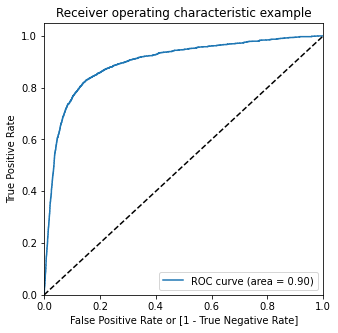

In [85]:
# We will use matplotlib to plot the ROC Curve

# Calling the ROC function
draw_roc(y_train_pred_final.Churn, y_train_pred_final.Churn_Prob)

<a> Area under the ROC curve is 0.90 which is great. We seem to have a good model. Let's also check the sensitivity and specificity trade-off to find out the optimal cutoff point.

In [86]:
# Let's create columns with different probability cutoffs 

numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Cust ID,Churn,Churn_Prob,Churn_Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,4715,0,0.122161,0,1,1,0,0,0,0,0,0,0,0
1,15222,0,0.000592,0,1,0,0,0,0,0,0,0,0,0
2,60145,0,0.024810,0,1,0,0,0,0,0,0,0,0,0
3,62445,0,0.042330,0,1,0,0,0,0,0,0,0,0,0
4,88349,0,0.026053,0,1,0,0,0,0,0,0,0,0,0


In [87]:
# Let's create a dataframe to see the values of accuracy, sensitivity, and specificity at 
# different values of probabiity cutoffs

cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.086781  1.000000  0.000000
0.1   0.1  0.856524  0.817883  0.860196
0.2   0.2  0.909268  0.693911  0.929733
0.3   0.3  0.923644  0.586396  0.955692
0.4   0.4  0.925025  0.450357  0.970131
0.5   0.5  0.922692  0.317060  0.980244
0.6   0.6  0.920360  0.209545  0.987907
0.7   0.7  0.918265  0.129457  0.993224
0.8   0.8  0.915266  0.057049  0.996820
0.9   0.9  0.913600  0.008228  0.999635


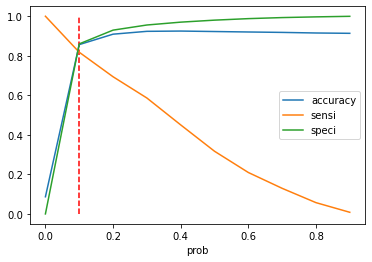

In [88]:
# Let's plot the intersection of accuracy, sensitivity and specificity

cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.vlines(x=0.1,ymax=1.0,ymin=0.0,color='r',linestyle='--')
plt.show()

<a> **0.1 seems to be an optimal cutoff for considering all three metrics. Let's use 0.1 as the cutoff**

In [89]:
y_train_pred_final['Final_Churn_Predicted'] = y_train_pred_final['Churn_Prob'].map(lambda x:1 if x>0.1 else 0)

y_train_pred_final.head()

,Cust ID,Churn,Churn_Prob,Churn_Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,Final_Churn_Predicted
0,4715,0,0.122161,0,1,1,0,0,0,0,0,0,0,0,1
1,15222,0,0.000592,0,1,0,0,0,0,0,0,0,0,0,0
2,60145,0,0.024810,0,1,0,0,0,0,0,0,0,0,0,0
3,62445,0,0.042330,0,1,0,0,0,0,0,0,0,0,0,0
4,88349,0,0.026053,0,1,0,0,0,0,0,0,0,0,0,0


In [90]:
# Let's check the accuracy now

metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.Final_Churn_Predicted)

0.8565240158042557

<a> Accuracy has decreased a bit from earlier. But we need to check the balance between the other metrics

In [91]:
# Let's create the confuion matrix
confusion2 = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.Final_Churn_Predicted)
confusion2

array([[16502,  2682],
       [  332,  1491]], dtype=int64)

In [92]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [93]:
#Let's Calculate Sensitivity
TP / float(TP+FN)

0.8178826110806363

<a> Encouraging! Sensitivity has picked up a lot

In [94]:
#Let's calculate specificity
TN / float(TN+FP)

0.8601959966638866

<a> Specificity is also decent with 90.6%

In [95]:
#Let's calculate Precision
TP / float(TP+FP)

0.35729690869877784

<a> Precision is still low as 35.6%

### Precision - Recall Tradeoff

In [96]:
# Let's import precision_recall curve
from sklearn.metrics import precision_recall_curve

In [97]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Churn, y_train_pred_final.Churn_Prob)

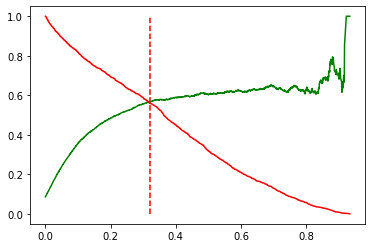

In [98]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.vlines(x=0.32,ymax=1.0,ymin=0.0,color='r',linestyle='--')
plt.show()

<a> **We are getting optimal cutoff as 0.32 by precision-recall curve. Let's use this to check the performance**

In [99]:
y_train_pred_final['Final_Churn_Predicted'] = y_train_pred_final['Churn_Prob'].map(lambda x:1 if x>0.32 else 0)

y_train_pred_final.head()

,Cust ID,Churn,Churn_Prob,Churn_Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,Final_Churn_Predicted
0,4715,0,0.122161,0,1,1,0,0,0,0,0,0,0,0,0
1,15222,0,0.000592,0,1,0,0,0,0,0,0,0,0,0,0
2,60145,0,0.024810,0,1,0,0,0,0,0,0,0,0,0,0
3,62445,0,0.042330,0,1,0,0,0,0,0,0,0,0,0,0
4,88349,0,0.026053,0,1,0,0,0,0,0,0,0,0,0,0


In [100]:
metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.Final_Churn_Predicted)

0.9243585471509497

<a> Good to see accuracy has increased considerably from the earlier cutoff

In [101]:
# Let's create confusion matrix once again

confusion3 = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.Final_Churn_Predicted)
confusion3

array([[18398,   786],
       [  803,  1020]], dtype=int64)

In [102]:
TP = confusion3[1,1] # true positive 
TN = confusion3[0,0] # true negatives
FP = confusion3[0,1] # false positives
FN = confusion3[1,0] # false negatives

In [103]:
#Let's Calculate Sensitivity/Recall
TP / float(TP+FN)

0.5595172792100932

In [104]:
#Let's calculate specificity
TN / float(TN+FP)

0.9590283569641368

In [105]:
#Let's calculate Precision
TP / float(TP+FP)

0.5647840531561462

<a> **Although we got a good accuracy precision and recall are still low hovering around 56%**

In [106]:
# let's print a report on the confusion matrix stats and visualize it
from sklearn.metrics import classification_report

print(classification_report(y_train_pred_final.Churn, y_train_pred_final.Final_Churn_Predicted))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96     19184
           1       0.56      0.56      0.56      1823

    accuracy                           0.92     21007
   macro avg       0.76      0.76      0.76     21007
weighted avg       0.92      0.92      0.92     21007



**Looking at the report with the precision, recall and f1-scores being low for the minority class 1, I start to wonder we may have a class imbalance problem here as we have discovered earlier in the analysis. Time to address this issue!**

## Class Imbalance

In [107]:
from collections import Counter

In [108]:
!pip install imblearn

In [109]:
pip install -U imbalanced-learn

Requirement already up-to-date: imbalanced-learn in c:\users\tousi\anaconda3\lib\site-packages (0.12.3)
Note: you may need to restart the kernel to use updated packages.


In [110]:
pip install -c glemaitre imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not open requirements file: [Errno 2] No such file or directory: 'glemaitre'


In [111]:
# We will be using the Smote Method

from imblearn.over_sampling import SMOTE
smt = SMOTE(random_state=45, k_neighbors=5)
X_resampled_smt, y_resampled_smt = smt.fit_resample(X_train, y_train)
len(X_resampled_smt)

38368

In [112]:
print(sorted(Counter(y_resampled_smt).items()))

[(0, 19184), (1, 19184)]


<a> We can see that we have achieved a balance in the class now, with 19184 rows belonging to each class

In [113]:
#Let's fit the model on the resampled data
lreg = LogisticRegression()
lreg.fit(X_resampled_smt, y_resampled_smt)
# Now let's predict on the train set
y_train_pred_smt = lreg.predict(X_train)

In [114]:
y_train_pred_smt_final = pd.DataFrame()
y_train_pred_smt_final['Cust ID'] = y_train.index
y_train_pred_smt_final['Churn'] = y_train.values 
y_train_pred_smt_final['Churn_Predicted'] = y_train_pred_smt
y_train_pred_smt_final.head()

,Cust ID,Churn,Churn_Predicted
0,4715,0,1
1,15222,0,0
2,60145,0,0
3,62445,0,0
4,88349,0,0


In [115]:
# Let's check the accuracy scores on the predictions
metrics.accuracy_score(y_train_pred_smt_final.Churn, y_train_pred_smt_final.Churn_Predicted)

0.8476698243442662

In [116]:
# Let's create confusion matrix once again

confusion4 = metrics.confusion_matrix(y_train_pred_smt_final.Churn, y_train_pred_smt_final.Churn_Predicted)
confusion4

array([[16297,  2887],
       [  313,  1510]], dtype=int64)

In [117]:
TP = confusion4[1,1] # true positive 
TN = confusion4[0,0] # true negatives
FP = confusion4[0,1] # false positives
FN = confusion4[1,0] # false negatives

In [118]:
#Let's Calculate Sensitivity/Recall
TP / float(TP+FN)

0.8283049917718047

In [119]:
#Let's calculate specificity
TN / float(TN+FP)

0.8495100083402836

In [120]:
#Let's calculate Precision
TP / float(TP+FP)

0.3434159654309757

In [121]:
# let's print a report on the confusion matrix stats and visualize it

print(classification_report(y_train_pred_smt_final.Churn, y_train_pred_smt_final.Churn_Predicted))

              precision    recall  f1-score   support

           0       0.98      0.85      0.91     19184
           1       0.34      0.83      0.49      1823

    accuracy                           0.85     21007
   macro avg       0.66      0.84      0.70     21007
weighted avg       0.93      0.85      0.87     21007



<a> **We can see that the model is performing slightly better on train set after we address the class imbalance problem. Although accuracy dipped to 84.7%, recall and specificity has picked up. Let's check performance in test set**

### Making predictions on Test Set

In [122]:
#alotting the same columns to test as in train set

X_test = X_test[X_train.columns]

In [123]:
#Scaling the variables through power transform

for i in X_test.columns:
    X_test[i] = pt.fit_transform(X_test[[i]])

In [124]:
y_test_pred = lreg.predict(X_test)
y_test_pred[:10]

array([1, 1, 0, 0, 0, 0, 1, 0, 0, 1])

In [125]:
# We will convert y_test_pred into a dataframe
y_test_pred_final = pd.DataFrame()
y_test_pred_final['Cust ID'] = y_test.index
y_test_pred_final['Churn'] = y_test.values
y_test_pred_final['Churn_Pred'] = y_test_pred
y_test_pred_final.head()

,Cust ID,Churn,Churn_Pred
0,29360,0,1
1,49979,0,1
2,90612,0,0
3,87007,0,0
4,91852,0,0


In [126]:
# Let's check accuracy

metrics.accuracy_score(y_test_pred_final['Churn'], y_test_pred_final['Churn_Pred'])

0.8513993780541982

<a> **Observation is pretty close to that we got for train set**

In [127]:
# Let's check confusion_matrix

confusion_test = metrics.confusion_matrix(y_test_pred_final['Churn'], y_test_pred_final['Churn_Pred'] )
confusion_test

array([[7010, 1224],
       [ 114,  656]], dtype=int64)

In [128]:
TP = confusion_test[1,1] # true positive 
TN = confusion_test[0,0] # true negatives
FP = confusion_test[0,1] # false positives
FN = confusion_test[1,0] # false negatives

In [129]:
# Let's calculate Recall, Specificity and Precision for test set

Recall = TP/(TP+FN)
Specificity = TN/(TN+FP)
Precision = TP/(TP+FP)

print('Recall:',Recall)
print("Specificity",Specificity)
print("Precision",Precision)

Recall: 0.8519480519480519
Specificity 0.8513480689822687
Precision 0.34893617021276596


In [130]:
print(classification_report(y_test_pred_final.Churn, y_test_pred_final.Churn_Pred))

              precision    recall  f1-score   support

           0       0.98      0.85      0.91      8234
           1       0.35      0.85      0.50       770

    accuracy                           0.85      9004
   macro avg       0.67      0.85      0.70      9004
weighted avg       0.93      0.85      0.88      9004



<a> **Precision and F1-score are coming out to be low although we are getting a good enough recall, specificity and accuracy. We can live with low precision in the telecom industry as long as the recall is high. Our motive here is to predict person who will be churning to provide him incentives not to leave. Hence impact of `False negatives` is much more than the impact of `False Positives`. I think we are able t minimize false negatives here to some extent**

### 2. Decision Tree Model

In [131]:
# Importing the decision tree classifier

from sklearn.tree import DecisionTreeClassifier

### Predictions:

In [132]:
dt = DecisionTreeClassifier(random_state=0)

In [133]:
# Let's reset the X_train and X_test to their original dataset
X_train,X_test,y_train,y_test = train_test_split(X,y, train_size=0.7, test_size=0.3, random_state=100)

In [134]:
# Let's resample the data with the original train and test set using SMOTE Over sampling technique

smt = SMOTE(random_state=45, k_neighbors=5)
X_resampled_smt, y_resampled_smt = smt.fit_resample(X_train, y_train)
len(X_resampled_smt)

38368

In [135]:
#fitting the model without tuning any hyperparameters

dt.fit(X_resampled_smt, y_resampled_smt)

DecisionTreeClassifier(random_state=0)

### Model Evaluation:

In [136]:
y_train_pred = dt.predict(X_train)
y_test_pred = dt.predict(X_test)

In [137]:
from sklearn.metrics import accuracy_score
print("Training Accuracy: ",accuracy_score(y_train, y_train_pred))
print("\n\nTesting Accuracy: ",accuracy_score(y_test, y_test_pred))

Training Accuracy:  1.0


Testing Accuracy:  0.8753887161261662


**The model clearly seems to be overfitting as training accuracy is 100%. Reason could be we have not tuned any hyperparameters. Let's check further.**

In [138]:
print("Training confusion_matrix:\n",confusion_matrix(y_train, y_train_pred))
print("\n\nTesting confusion_matrix:\n",confusion_matrix(y_test, y_test_pred))

Training confusion_matrix:
 [[19184     0]
 [    0  1823]]


Testing confusion_matrix:
 [[7426  808]
 [ 314  456]]


<a> **As we can see, there are 0 `false_positives` and 0 `false_negatives` shown by the confusion_matrix as the model overfits.**

<a> **Decision Trees have a tendency to overfit if the hyperparameters are not tuned Let's tune some hyperparameters to stop the model from overfitting**

In [139]:
#Tuning only hyperparameter max_depth equals to 3

dt2 = DecisionTreeClassifier(max_depth=3)
dt2.fit(X_resampled_smt, y_resampled_smt)

DecisionTreeClassifier(max_depth=3)

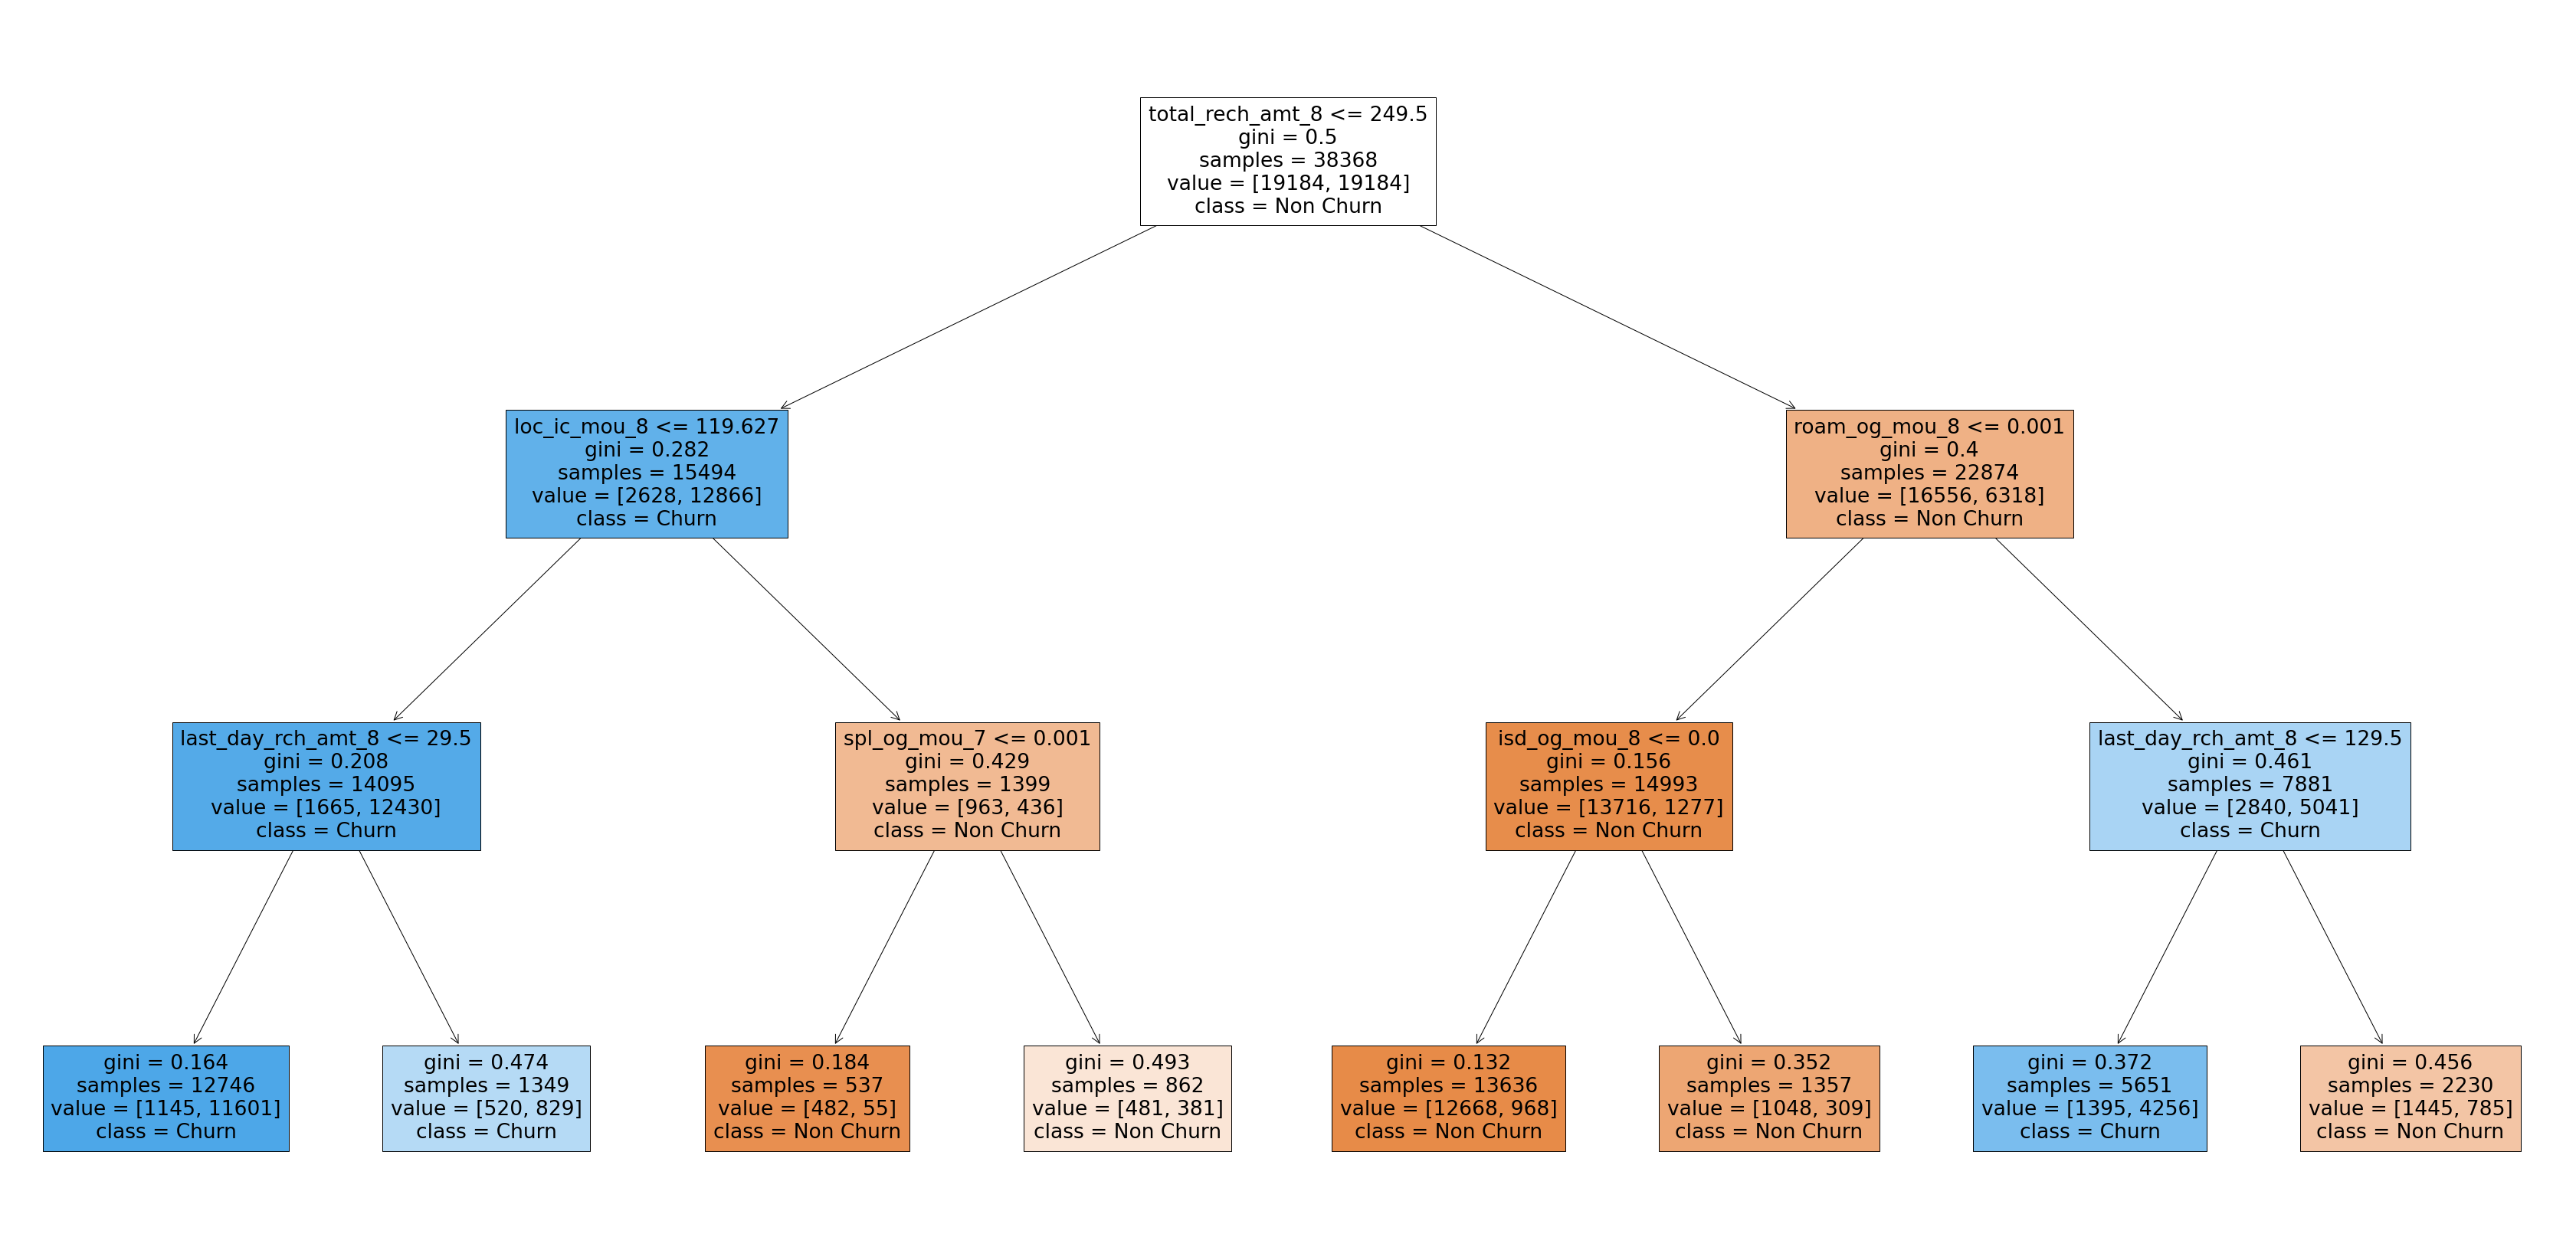

In [140]:
from sklearn.tree import plot_tree
plt.figure(figsize=(60,30))
plot_tree(dt2, feature_names = X_train.columns,class_names=['Non Churn', "Churn"],filled=True);

<a> We can observe that after tuning one hyperparameter the model is probably not overfitting. Let's verify!

**Model Evaluation**

In [141]:
y_train_pred = dt2.predict(X_train)
y_test_pred = dt2.predict(X_test)

In [142]:
print(accuracy_score(y_train, y_train_pred))
confusion_matrix(y_train, y_train_pred)

0.836578283429333


array([[16124,  3060],
       [  373,  1450]], dtype=int64)

In [143]:
print(accuracy_score(y_test, y_test_pred))
confusion_matrix(y_test, y_test_pred)

0.8378498445135495


array([[6922, 1312],
       [ 148,  622]], dtype=int64)

<a> **Train and Test scores are close to each other which shows the model is not overfitting**

<a> Let's look at recall and precision to understand the performance further

In [144]:
print ('F1 score: ', f1_score(y_test, y_test_pred))
print ('Recall: ', recall_score(y_test, y_test_pred))
print ('Precision: ', precision_score(y_test, y_test_pred))

F1 score:  0.4600591715976331
Recall:  0.8077922077922078
Precision:  0.3216132368148914


<a> We are getting low precision and F1-Score. Let's try and optimize the hyperparameters through automated techniques like GridSearch

### Using GridSearchCV

In [145]:
dt_GS = DecisionTreeClassifier(random_state=42)

<a> **We will be using GridSearch to iterate through the hyperparameters to get to a best set of parameters for the model.**

In [146]:
from sklearn.model_selection import GridSearchCV

In [147]:
# Create the parameter grid based on the results of random search 
params = {
    'max_depth': [2, 3, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'criterion': ["gini", "entropy"]
}

In [148]:
# Instantiating the grid search model
grid_search = GridSearchCV(estimator=dt_GS, 
                           param_grid=params, 
                           cv=4, n_jobs=-1, verbose=1, scoring = "accuracy")

In [149]:
%%time
grid_search.fit(X_resampled_smt, y_resampled_smt)

Fitting 4 folds for each of 50 candidates, totalling 200 fits
Wall time: 1min 18s


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100]},
             scoring='accuracy', verbose=1)

In [150]:
score_df = pd.DataFrame(grid_search.cv_results_)
score_df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
0,1.132551,0.041876,0.016045,0.009847,gini,2,5,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.827669,0.83872,0.836426,0.845913,0.837182,0.006513,46
1,1.124360,0.047208,0.015626,0.000001,gini,2,10,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.827669,0.83872,0.836426,0.845913,0.837182,0.006513,46
2,0.672457,0.027158,0.012158,0.008814,gini,2,20,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.827669,0.83872,0.836426,0.845913,0.837182,0.006513,46
3,0.660802,0.026042,0.011724,0.006769,gini,2,50,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.827669,0.83872,0.836426,0.845913,0.837182,0.006513,46
4,0.662254,0.014837,0.007782,0.007782,gini,2,100,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.827669,0.83872,0.836426,0.845913,0.837182,0.006513,46


In [151]:
score_df.nlargest(5,"mean_test_score")

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
45,6.323519,0.182334,0.015625,0.000002,entropy,20,5,"{'criterion': 'entropy', 'max_depth': 20, 'min...",0.869475,0.912114,0.911176,0.912531,0.901324,0.018395,1
20,6.663154,0.176837,0.004909,0.006402,gini,20,5,"{'criterion': 'gini', 'max_depth': 20, 'min_sa...",0.869683,0.907423,0.914825,0.912114,0.901011,0.018280,2
40,4.885078,0.022247,0.013067,0.005070,entropy,10,5,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.877815,0.908882,0.904504,0.905651,0.899213,0.012458,3
15,3.344130,0.061599,0.011690,0.006749,gini,10,5,"{'criterion': 'gini', 'max_depth': 10, 'min_sa...",0.874166,0.902314,0.910446,0.908153,0.898770,0.014511,4
46,5.955204,0.061704,0.015625,0.000002,entropy,20,10,"{'criterion': 'entropy', 'max_depth': 20, 'min...",0.864887,0.909716,0.909716,0.905755,0.897519,0.018909,5


In [152]:
grid_search.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=20, min_samples_leaf=5,
                       random_state=42)

In [153]:
dt_GS_best = grid_search.best_estimator_

**Model Evaluation**

In [154]:
y_train_pred = dt_GS_best.predict(X_train)
y_test_pred = dt_GS_best.predict(X_test)

In [155]:
print(accuracy_score(y_train, y_train_pred))
confusion_matrix(y_train, y_train_pred)

0.9694863616889609


array([[18726,   458],
       [  183,  1640]], dtype=int64)

In [156]:
print(accuracy_score(y_test, y_test_pred))
confusion_matrix(y_test, y_test_pred)

0.8768325188804975


array([[7432,  802],
       [ 307,  463]], dtype=int64)

<a> **We are getting much higher accuracy scores for both train and test sets with GridSearch but need to check precision and recall!**

In [157]:
print ('F1 score: ', f1_score(y_test, y_test_pred))
print ('Recall: ', recall_score(y_test, y_test_pred))
print ('Precision: ', precision_score(y_test, y_test_pred))

F1 score:  0.45503685503685504
Recall:  0.6012987012987013
Precision:  0.3660079051383399


<a> **Recall has reduced to 60% and F1-score and Precision scores are similar to the model with only max_depth=3!**

## 3.Random Forest Model

In [211]:
from sklearn.ensemble import RandomForestClassifier
#Let's create the RandomForestClassifier and specify the hyperparameters. We can try different combinations.
rf = RandomForestClassifier(random_state=42, n_estimators=20, max_depth=5)
rf.fit(X_resampled_smt, y_resampled_smt)

y_pred_rf = rf.predict(X_test)

In [212]:
print ('Accuracy: ', accuracy_score(y_test, y_pred_rf))
print ('F1 score: ', f1_score(y_test, y_pred_rf))
print ('Recall: ', recall_score(y_test, y_pred_rf))
print ('Precision: ', precision_score(y_test, y_pred_rf))
print ('\n clasification report:\n', classification_report(y_test,y_pred_rf))
print ('\n confussion matrix:\n',confusion_matrix(y_test, y_pred_rf))

Accuracy:  0.8725011106175034
F1 score:  0.5256198347107437
Recall:  0.825974025974026
Precision:  0.38545454545454544

 clasification report:
               precision    recall  f1-score   support

           0       0.98      0.88      0.93      8234
           1       0.39      0.83      0.53       770

    accuracy                           0.87      9004
   macro avg       0.68      0.85      0.73      9004
weighted avg       0.93      0.87      0.89      9004


 confussion matrix:
 [[7220 1014]
 [ 134  636]]


<a> **So far we have the most balanced results in terms of scores using Random Forest Model with an accuracy of 86.4% but Precison is still a bit on the lower side**

In [213]:
rf.estimators_[0]

DecisionTreeClassifier(max_depth=5, max_features='sqrt',
                       random_state=1608637542)

In [214]:
sample_tree = rf.estimators_[0]

#### Let's use GridSearch for Hyperparameter Tuning

In [215]:
GS_rf = RandomForestClassifier(random_state=0, n_jobs=-1)

In [217]:
# Creating the parameter grid  
params = {
    'max_depth': [1, 2, 3, 5, 10, 20, 30],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'max_features': [2,3,4],
    'n_estimators': [10, 30, 50, 100, 200]
}

In [218]:
# Instantiating the grid search model
grid_search = GridSearchCV(estimator=GS_rf, param_grid=params, 
                          cv=4, n_jobs=-1, verbose=1, scoring = "accuracy")

In [165]:
grid_search.fit(X_resampled_smt, y_resampled_smt)

Fitting 4 folds for each of 375 candidates, totalling 1500 fits


KeyboardInterrupt: 

<a> **Unfortunately GridSearchCV in Random Forest Model is taking too much time! To save time I interrupted the processing and let's look at faster search technique**

### Using RandomizedSearchCV 

In [219]:
# Using Randomized SearchCV instead of GridSearchCV

from sklearn.model_selection import RandomizedSearchCV

In [220]:
# Storing the classifier object
RS_rf = RandomForestClassifier(random_state=0, n_jobs=-1)

In [222]:
# Creating the parameter grid  
params = {
    'max_depth': [1, 2, 3, 5, 10, 20, 30],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'max_features': [2,3,4],
    'n_estimators': [10, 30, 50, 100, 200]
}

In [223]:
# Instantiating the randomized search model
# Good thing about Randomized Search is that we can define the number of iterations by n_iter
randomized_search = RandomizedSearchCV(estimator=RS_rf, param_distributions=params, 
                          n_iter=20, cv=4, n_jobs=-1, verbose=1, scoring = "accuracy")

In [224]:
%%time
randomized_search.fit(X_resampled_smt, y_resampled_smt)

Fitting 4 folds for each of 20 candidates, totalling 80 fits
Wall time: 53.1 s


RandomizedSearchCV(cv=4,
                   estimator=RandomForestClassifier(n_jobs=-1, random_state=0),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'max_depth': [1, 2, 3, 5, 10, 20, 30],
                                        'max_features': [2, 3, 4],
                                        'min_samples_leaf': [5, 10, 20, 50,
                                                             100],
                                        'n_estimators': [10, 30, 50, 100, 200]},
                   scoring='accuracy', verbose=1)

<a>**We can observe here that we did only 80 fits here rather than 1500 as in the case of GridSearch. Hence the processing used and time taken is much less in this case taking only 53 secs**

In [225]:
# Let's store the best estimator
RS_rf_best = randomized_search.best_estimator_

In [226]:
RS_rf_best

RandomForestClassifier(max_depth=20, max_features=2, min_samples_leaf=5,
                       n_estimators=10, n_jobs=-1, random_state=0)

In [227]:
y_pred_RS_rf = RS_rf_best.predict(X_test)

In [228]:
print ('Accuracy: ', accuracy_score(y_test, y_pred_RS_rf))
print ('F1 score: ', f1_score(y_test, y_pred_RS_rf))
print ('Recall: ', recall_score(y_test, y_pred_RS_rf))
print ('Precision: ', precision_score(y_test, y_pred_RS_rf))
print ('\n clasification report:\n', classification_report(y_test,y_pred_RS_rf))
print ('\n confussion matrix:\n',confusion_matrix(y_test, y_pred_RS_rf))

Accuracy:  0.9127054642381164
F1 score:  0.5914760914760915
Recall:  0.7389610389610389
Precision:  0.4930675909878683

 clasification report:
               precision    recall  f1-score   support

           0       0.97      0.93      0.95      8234
           1       0.49      0.74      0.59       770

    accuracy                           0.91      9004
   macro avg       0.73      0.83      0.77      9004
weighted avg       0.93      0.91      0.92      9004


 confussion matrix:
 [[7649  585]
 [ 201  569]]


### Feature Importance in Tree Models

In [229]:
# Let's create a new classifier
classifier_rf = RandomForestClassifier(random_state=42, n_jobs=-1, max_depth=5, n_estimators=100, oob_score=True)

In [230]:
classifier_rf.fit(X_resampled_smt, y_resampled_smt)

RandomForestClassifier(max_depth=5, n_jobs=-1, oob_score=True, random_state=42)

In [231]:
classifier_rf.feature_importances_

array([1.08777081e-03, 1.91364563e-02, 9.74690110e-02, 9.39993369e-04,
       2.32954585e-02, 8.90792182e-02, 8.79027301e-04, 1.41862362e-02,
       8.50644022e-02, 2.66770160e-03, 3.93727242e-03, 1.51285594e-02,
       1.73762471e-03, 1.32650266e-03, 8.11586316e-04, 6.15329872e-03,
       4.07975942e-03, 5.00240513e-03, 4.14600314e-03, 0.00000000e+00,
       0.00000000e+00, 1.48112678e-03, 7.47725164e-03, 1.08507896e-01,
       1.76109134e-03, 6.29594362e-04, 1.91774621e-02, 1.16048979e-03,
       1.18247545e-04, 2.27705357e-03, 3.46810765e-03, 7.37172194e-04,
       6.42377351e-04, 4.55952419e-04, 6.26253916e-04, 2.03163161e-03,
       1.50987048e-01, 3.88980109e-03, 3.39596894e-03, 1.20617411e-01,
       4.12230385e-03, 1.55489120e-02, 8.56520923e-02, 9.36491000e-04,
       4.34176032e-04, 1.14921189e-02, 5.20173197e-04, 5.78877214e-04,
       6.69995992e-03, 3.39799237e-03, 2.11342514e-03, 5.06559618e-03,
       4.34582404e-05, 2.88636133e-04, 2.51254729e-03, 1.20645988e-04,
      

In [232]:
imp_df = pd.DataFrame({
    "Varname": X_resampled_smt.columns,
    "Imp": classifier_rf.feature_importances_
})

In [260]:
imp_df_sorted = imp_df.sort_values(by="Imp", ascending=False)
imp_df_sorted

,Varname,Imp
36,total_rech_amt_8,0.150987
39,max_rech_amt_8,0.120617
23,loc_ic_mou_8,0.108508
2,roam_ic_mou_8,0.097469
5,roam_og_mou_8,0.089079
42,last_day_rch_amt_8,0.085652
8,loc_og_mou_8,0.085064
4,roam_og_mou_7,0.023295
69,avg_ic_mou,0.023188
26,std_ic_mou_8,0.019177


<a> **Top five features for predicting churn according turn out to be `Total Recharge for 8th Month`,  `Maximum Recharge for 8th Month`,  `Local Incoming Minutes of Usage for 8th month`, `roaming incoming usage for 8th month` and  `Roaming Outgoing Usage for 8th month`.**

In [237]:
# Now let's have a look at the top selected variables by RFE method in Logistic Regression
print(list(cols))

['roam_og_mou_8', 'loc_ic_mou_8', 'spl_ic_mou_8', 'total_rech_amt_8', 'max_rech_amt_6', 'max_rech_amt_7', 'last_day_rch_amt_8', 'vol_2g_mb_8', 'aon', 'jun_vbc_3g', 'sep_vbc_3g', 'avg_rech_amt_good_phase', 'avg_og_mou', 'tot_onnet_mou', 'tot_offnet_mou']


In [264]:
# Now let's print the common variables present in top 15 of both the models
top_vars = []
for i in list(cols):
    if i in list(imp_df_sorted['Varname'][:15]):
        top_vars.append(i)
top_vars

['roam_og_mou_8',
 'loc_ic_mou_8',
 'total_rech_amt_8',
 'last_day_rch_amt_8',
 'vol_2g_mb_8']

<a> **The takeaway here is to focus on these features in our campaigns as they are one of the most vital features that can influence a customer churning or retaining.**

**<a>Let's compare the results of different models and select the best one**

## Model Comparison:

In [234]:
# Printing the result of Logistic Regression Model
print('Logistic Regression Best Results\n')
print ('Accuracy: ', accuracy_score(y_test, y_test_pred_final.Churn_Pred))
print ('F1 score: ', f1_score(y_test, y_test_pred_final.Churn_Pred))
print ('Recall: ', recall_score(y_test, y_test_pred_final.Churn_Pred))
print ('Precision: ', precision_score(y_test, y_test_pred_final.Churn_Pred))
print ('\n clasification report:\n', classification_report(y_test,y_test_pred_final.Churn_Pred))
print ('\n confussion matrix:\n',confusion_matrix(y_test, y_test_pred_final.Churn_Pred))

print('___________________________________________________________\n')

print('Decision Tree Best Results\n')
print ('Accuracy: ', accuracy_score(y_test, y_test_pred))
print ('F1 score: ', f1_score(y_test, y_test_pred))
print ('Recall: ', recall_score(y_test, y_test_pred))
print ('Precision: ', precision_score(y_test, y_test_pred))
print ('\n clasification report:\n', classification_report(y_test,y_test_pred))
print ('\n confussion matrix:\n',confusion_matrix(y_test, y_test_pred))

print('___________________________________________________________\n')

print('Random Forest Best Results\n')
print ('Accuracy: ', accuracy_score(y_test, y_pred_RS_rf))
print ('F1 score: ', f1_score(y_test, y_pred_RS_rf))
print ('Recall: ', recall_score(y_test, y_pred_RS_rf))
print ('Precision: ', precision_score(y_test, y_pred_RS_rf))
print ('\n clasification report:\n', classification_report(y_test,y_pred_RS_rf))
print ('\n confussion matrix:\n',confusion_matrix(y_test, y_pred_RS_rf))

Logistic Regression Best Results

Accuracy:  0.8513993780541982
F1 score:  0.49509433962264154
Recall:  0.8519480519480519
Precision:  0.34893617021276596

 clasification report:
               precision    recall  f1-score   support

           0       0.98      0.85      0.91      8234
           1       0.35      0.85      0.50       770

    accuracy                           0.85      9004
   macro avg       0.67      0.85      0.70      9004
weighted avg       0.93      0.85      0.88      9004


 confussion matrix:
 [[7010 1224]
 [ 114  656]]
___________________________________________________________

Decision Tree Best Results

Accuracy:  0.8768325188804975
F1 score:  0.45503685503685504
Recall:  0.6012987012987013
Precision:  0.3660079051383399

 clasification report:
               precision    recall  f1-score   support

           0       0.96      0.90      0.93      8234
           1       0.37      0.60      0.46       770

    accuracy                           0.88   

## Conclusion:<br>
 <a> 
     
 - We can observe here that Random Forest model have the best performance with an `Accuracy` of `92%` and `Recall` and `f1-score` of `73%` and `61%` respectively.
 - Although Logistic Regression results are not bad as well with `Accuracy` and `Recall` at `85%` and `84.4%` respectively but in this case we are getting a low `Precision` which is rectified to some extent by the Random Forest Model.
 - Having these results, it is imperical to mention here `model evaluation scores` and their importance also depend upon the kind of industry we are working with and what is the strategy behind the analysis.
 - For instance, in this case we are doing the analysis for the telecom industry where the strategy behind the analysis is to predict the `churn` of a customer, which will be used by the marketing team to target their marketing and incentive campaigns.
 - Hence our primary aim is to minimize `False negatives` where a customer is going to churn, which is more important than minimizing `False positives`, where a customer is not going to churn. Predicting a churn customer as non-churn will hurt the organization more because we know in this industry acquiring customer is much more expensive than retaining them.
 - `Recall` is a measure of reduced `False Negatives` which we have been able to achieve. On the other hand `Precision` is a measure of reduced `False Positives`, which in this case we even can live with a lower value which only means that the campaigns will be targeted to non-churn customers as well along with churn customers, which is not a big worry at this moment, other than the marketing budget.

## Recommendations:<br>
  <a>
    
  - Among the High-value customers I would recommend to create premium `roaming` packages with free of cost outgoing of 200 mins. This can help customer retention
  - Provide unlimited `talktime` and sms packages for `local calls` to customers who are likely to churn.
  - Provide special discount vouchers for `recharge` amount above a certain threshold
  - Increase `Average Order Value` of Recharge amount among the highest value customers with attractive `subscription packages of roaming, OTT etc`.
  - Provide specific discount vouchers for `2g internet usage` with attractive data packs, data boosters or data top-ups with minimal amount.
  - If the `AON` i.e age of the customer on network is more. Focus on providing exciting and focused offers to these customers.
  - Try and convert older high value customers to `post-paid mode` and pay per volume.
  - Attractive roaming packages with exciting discount offers will help in retaining high-value customers.